In [5]:
import cv2
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
mmscaler = MinMaxScaler()
sdscaler = StandardScaler()

In [9]:
dd = pd.read_pickle("/home/hb/python/phospho/data/required/0308_final_train_test/dataset3.pkl")
dd

,pair11,Name,Family,Group,kin_id,subseq,sub_id,answer,pair,subseq13,kinseq,matrix,repl,type
0,O00506_Q9BUL8_LSAAQTLRAAF,YSK1,STE20,STE,O00506,VNLSAAQTLRAAFIK,Q9BUL8,1,O00506_NLSAAQTLRAAFI,NLSAAQTLRAAFI,FTKLDRIGKGSFGEVYKGIDNHTKEVVAIKIIDLEEAEDEIEDIQQ...,"[[[1.160673, 0.9617507, 1.0963649, 1.0789626, ...",0,train3
1,O14733_Q13158_RSGAMSPMSWN,MAP2K7,STE7,STE,O14733,QNRSGAMSPMSWNSD,Q13158,1,O14733_NRSGAMSPMSWNS,NRSGAMSPMSWNS,0ENLGEMGSGTCGQVWKMRFRKTGHVIAVKQMRRSGNKEENKRILM...,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0,train3
2,O14920_Q99704_GSGIKSHNSAL,IKKb,IKK,Other,O14920,ATGSGIKSHNSALYS,Q99704,1,O14920_TGSGIKSHNSALY,TGSGIKSHNSALY,0EMKERLGTGGFGNVIRWHNQETGEQIAIKQCRQELSPRNRERWCL...,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0,train3
3,O14920_Q14653_PLSLTSDQYKA,IKKb,IKK,Other,O14920,SHPLSLTSDQYKAYL,Q14653,1,O14920_HPLSLTSDQYKAY,HPLSLTSDQYKAY,0EMKERLGTGGFGNVIRWHNQETGEQIAIKQCRQELSPRNRERWCL...,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0,train3
4,O14920_Q04206_PYADPSLQAPV,IKKb,IKK,Other,O14920,TPPYADPSLQAPVRV,Q04206,1,O14920_PPYADPSLQAPVR,PPYADPSLQAPVR,0EMKERLGTGGFGNVIRWHNQETGEQIAIKQCRQELSPRNRERWCL...,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0,train3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21156,P54646_Q14524_LPKSDSEDGPR,AMPKa2,CAMKL,CAMK,P54646,DRLPKSDSEDGPRAM,Q14524,0,P54646_RLPKSDSEDGPRA,RLPKSDSEDGPRA,0VLGDTLGVGTFGKVKIGEHQLTGHKVAVKILNRQKIRSLDVGKIK...,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0,test3
21157,P19784_Q14980_SSARRSQAGVS,CK2a2,CK2,CMGC,P19784,TRSSARRSQAGVSSG,Q14980,0,P19784_RSSARRSQAGVSS,RSSARRSQAGVSS,YQLVRKLGRGKYSEVFEAINITNNERVVVKILKPVKKKKIKREVKI...,"[[[1.0273678, 1.0618366, 1.0232666, 1.0232666,...",0,test3
21158,Q9UQM7_Q9P270_SLGPGSPVRAG,CaMK2a,CAMK2,CAMK,Q9UQM7,AGSLGPGSPVRAGAS,Q9P270,0,Q9UQM7_GSLGPGSPVRAGA,GSLGPGSPVRAGA,YQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINTKKLSARDHQKLE...,"[[[1.1241194, 0.98117936, 1.0232666, 1.1525767...",0,test3
21159,Q06187_Q96PD2_PDELVYQVPQS,BTK,Tec,TK,Q06187,PAPDELVYQVPQSTQ,Q96PD2,0,Q06187_APDELVYQVPQST,APDELVYQVPQST,LTFLKELGTGQFGVVKYGKWRGQYDVAIKMIKEGSMSEDEFIEEAK...,"[[[0.78270453, 1.3008267, 0.78270453, 0.844508...",0,test3


In [6]:
kinmap = pd.read_csv("../kinase_family_kinmap.csv")
df = pd.read_pickle("grad_cam_result.pkl")
del df['grad_cam'], df['grad_cam_pp']
df.head(2)

,pair,kinase,uniprotID,substrate,family,group,gradcam_resize,gradcam_pp_resize,flatten_gradcam
0,Q9UM73_RVCSLCYRELAAQ,ALK,Q9UM73,RVCSLCYRELAAQ,ALK,TK,"[[0.0, 0.0, 0.0, 0.0, 0.000373999, 0.0, 0.0, 0...","[[0.0205638, 0.05325572, 0.06773758, 0.1056384...","[0.0, 0.0, 0.0, 0.0, 0.000373999, 0.0, 0.0, 0...."
1,Q9UM73_GLARDIYKDPDYV,ALK,Q9UM73,GLARDIYKDPDYV,ALK,TK,"[[0.0, 0.00014063294, 0.0, 0.00013235305, 0.0,...","[[0.033400796, 0.0, 0.09327865, 0.0, 0.0822797...","[0.0, 0.00014063294, 0.0, 0.00013235305, 0.0, ..."


In [7]:
len('RVCSLCYRELAAQ')

13

In [8]:
df['gradcam_resize'][0].shape

(263, 15)

In [4]:
# flatten_gradcam 정규화, 표준화 먼저
flatten_gradcam = np.array([x for x in df['flatten_gradcam']])
flatten_gradcam.shape
flatten_gradcam_mm = mmscaler.fit_transform(flatten_gradcam)
flatten_gradcam_sd = sdscaler.fit_transform(flatten_gradcam)

flatten_gradcam_mm = [x for x in flatten_gradcam_mm]
df['avg_gradcam_mm_bavg'] = flatten_gradcam_mm

flatten_gradcam_sd = [x for x in flatten_gradcam_sd]
df['avg_gradcam_sd_bavg'] = flatten_gradcam_sd

# # kinase 기준, groupby, mean
# family_gradcam = df.groupby("kinase").mean()
# family_gradcam['counts'] = df.kinase.value_counts(sort=False)

# origin_gradcam = family_gradcam['gradcam_b_avg']
# minmax_gradcam = family_gradcam['gradcam_minmax_b_avg']
# standard_gradcam = family_gradcam['gradcam_standard_b_avg']

# flatten_gradcam 평균 낸 후 정규화, 표준화 나중에
flatten_gradcam = np.array([x for x in df['flatten_gradcam']])

family_gradcam = df.groupby("kinase").mean()


minmax_gradcam = mmscaler.fit_transform([x for x in family_gradcam['flatten_gradcam']])
standard_gradcam = sdscaler.fit_transform([x for x in family_gradcam['flatten_gradcam']])

family_gradcam['avg_gradcam_mm_aavg'] = [x for x in minmax_gradcam]
family_gradcam['avg_gradcam_sd_aavg'] = [x for x in standard_gradcam]
family_gradcam['counts'] = df.kinase.value_counts(sort=False)

origin_gradcam = family_gradcam['flatten_gradcam']
minmax_gradcam_aavg = family_gradcam['avg_gradcam_mm_aavg']
standard_gradcam_aavg = family_gradcam['avg_gradcam_sd_aavg']

minmax_gradcam_bavg = family_gradcam['avg_gradcam_mm_bavg']
standard_gradcam_bavg = family_gradcam['avg_gradcam_sd_bavg']

In [5]:
famdict = {_name: _family for _name, _family in zip(kinmap['xName'], kinmap['Family'])}

In [6]:
family_gradcam['family'] = [famdict[i] if i in famdict.keys() else None for i in family_gradcam.index ]
family_gradcam.head(2)

,gradcam_resize,gradcam_pp_resize,flatten_gradcam,avg_gradcam_mm_bavg,avg_gradcam_sd_bavg,avg_gradcam_mm_aavg,avg_gradcam_sd_aavg,counts,family
kinase,,,,,,,,,
AAK1,"[[0.0022991758, 0.00022196364, 0.0008329642, 0...","[[0.31718615, 0.0979229, 0.11910226, 0.1866089...","[0.0022991758, 0.00022196364, 0.0008329642, 0....","[0.14939082, 0.00995666, 0.07095721, 0.1728009...","[3.1084259, -0.040864963, 0.87434125, 2.217296...","[0.7455611978102972, 0.07993646200998251, 0.36...","[4.367759896668186, -0.4119993430381996, 0.994...",4,NAK
ABL1,"[[0.0003537328, 0.000356095, 0.00038298912, 0....","[[0.088302866, 0.07992635, 0.105065696, 0.0559...","[0.0003537328, 0.000356095, 0.00038298912, 0.0...","[0.022984063, 0.01597341, 0.03262545, 0.038312...","[0.15337561, 0.16580573, 0.18820421, 0.1791750...","[0.11470607710045722, 0.12824161076245336, 0.1...","[-0.09177897335113555, -0.055475280658582524, ...",435,Abl


In [7]:
origin_gradcam = family_gradcam['flatten_gradcam']
minmax_gradcam_aavg = family_gradcam['avg_gradcam_mm_aavg']
standard_gradcam_aavg = family_gradcam['avg_gradcam_sd_aavg']

minmax_gradcam_bavg = family_gradcam['avg_gradcam_mm_bavg']
standard_gradcam_bavg = family_gradcam['avg_gradcam_sd_bavg']

In [8]:
from collections import namedtuple
CorMatrix = namedtuple("CorMatrix", ['origin_gradcam', 'avg_gc_mm_bavg', 'avg_gc_sd_bavg', 'avg_gc_mm_aavg', 'avg_gc_sd_aavg'])

# corr_matrix = CorMatrix()
def make_cor_matrix(df):
    grad_cam_mean = pd.DataFrame([df[x] for x in df.index], index=df.index)
    grad_cam_mean = grad_cam_mean.T
    grad_cam_mean_corr = grad_cam_mean.corr()
    return grad_cam_mean_corr

corr_matrix = []
for i in [origin_gradcam, minmax_gradcam_aavg, standard_gradcam_aavg, minmax_gradcam_bavg, standard_gradcam_bavg]:
    print(i.name)
    corr_matrix.append(make_cor_matrix(i))
corr_matrix = CorMatrix(*corr_matrix)

flatten_gradcam
avg_gradcam_mm_aavg
avg_gradcam_sd_aavg
avg_gradcam_mm_bavg
avg_gradcam_sd_bavg


In [12]:
# corr_matrix_dict = corr_matrix.standard_gradcam.to_dict()

# THRESHOLD = 0.3
# for _key, _value in corr_matrix_dict.items():
#     threshold_dict = {}
#     for __key, __value in _value.items():
        
#         if __value > THRESHOLD:

#             __key_fam = name_fam_dict[__key]
#             threshold_dict[__key] = np.array([__value, __key_fam])
#     corr_matrix_dict[_key] = threshold_dict

In [13]:
# fam_kinlist_dict = {}
# for _family in kinmap.Family.unique():
#     _df = kinmap[kinmap['Family']==_family]
#     _kinases = _df.xName.unique()
#     fam_kinlist_dict[_family] = _kinases

In [162]:
cormatrix = corr_matrix.avg_gc_sd_aavg
cormatrix

kinase,AAK1,ABL1,ABL2,ACK,ALK,AMPKa1,AMPKa2,ARAF,AXL,AurA,...,YSK1,ZAK,ZAP70,caMLCK,p38a,p38b,p38d,p38g,skMLCK,smMLCK
kinase,,,,,,,,,,,,,,,,,,,,,
AAK1,1.000000,-0.316063,-0.272546,-0.101914,-0.313361,0.002529,0.332314,0.210186,-0.148263,-0.128727,...,0.121164,0.420253,0.015459,0.396777,0.040632,0.213636,0.556864,0.161438,-0.119224,0.224097
ABL1,-0.316063,1.000000,0.884805,-0.019651,0.278708,0.114364,-0.188275,-0.490971,0.175412,0.242046,...,-0.211852,-0.198267,-0.115056,-0.231510,0.201975,0.089852,-0.376748,0.029054,0.091816,-0.248164
ABL2,-0.272546,0.884805,1.000000,-0.048827,0.390843,0.099072,-0.138857,-0.488783,0.025586,0.298233,...,-0.256751,-0.155400,-0.014249,-0.179707,0.277001,0.044287,-0.363299,0.112347,0.091825,-0.202589
ACK,-0.101914,-0.019651,-0.048827,1.000000,-0.037337,0.496747,0.147139,-0.127502,0.225317,0.141839,...,0.150013,-0.305483,0.070660,-0.061446,0.219969,0.273398,-0.206214,0.038783,0.280068,0.097157
ALK,-0.313361,0.278708,0.390843,-0.037337,1.000000,0.114303,-0.008592,-0.062089,0.098815,0.162768,...,-0.169938,-0.293139,0.105406,-0.242391,0.087926,-0.230147,-0.260151,-0.013043,-0.024296,-0.035585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p38b,0.213636,0.089852,0.044287,0.273398,-0.230147,0.039068,-0.143123,-0.104955,0.117553,0.199504,...,0.168972,0.023206,-0.092194,0.003079,0.287758,1.000000,0.137425,-0.150256,-0.105764,0.025863
p38d,0.556864,-0.376748,-0.363299,-0.206214,-0.260151,-0.106084,0.388802,0.203127,-0.144974,-0.288855,...,0.092952,0.356137,0.278862,0.403218,-0.129824,0.137425,1.000000,0.217778,-0.238522,0.183047
p38g,0.161438,0.029054,0.112347,0.038783,-0.013043,0.071097,0.281521,-0.070932,-0.036645,-0.061717,...,0.066377,0.076198,-0.147738,0.248034,0.111451,-0.150256,0.217778,1.000000,0.128039,0.188968


In [19]:
cor = np.array(cormatrix)
cor[0]

array([ 1.00000000e+00, -3.16063408e-01, -2.72545569e-01, -1.01914112e-01,
       -3.13360766e-01,  2.52875828e-03,  3.32313844e-01,  2.10185539e-01,
       -1.48262632e-01, -1.28726857e-01, -1.32256764e-01,  1.73189074e-01,
        1.01263014e-01,  6.03322599e-02,  2.99164209e-01,  1.75065598e-01,
        3.66767656e-01,  8.12254060e-02,  1.95166812e-01, -2.40098814e-01,
        1.47215200e-01,  1.24340231e-01,  1.40717143e-01,  3.45438226e-01,
        1.15040739e-01, -9.27453989e-02, -3.64312270e-01, -7.18960323e-02,
        7.01769006e-02, -3.33815605e-01, -2.89563169e-01, -3.55785198e-01,
       -4.12458786e-02,  3.76163882e-03, -6.35800676e-02,  5.08205564e-02,
        4.96788661e-02,  1.07452423e-01, -5.67729095e-02, -2.14600411e-01,
        6.08851259e-03, -1.94102145e-01,  1.87461014e-01,  3.17111082e-01,
        2.53482320e-01,  2.37812675e-01,  1.65491537e-01,  3.63047976e-03,
        1.85547850e-01,  8.61370298e-02,  1.51797837e-02,  1.68105822e-02,
        7.29358586e-02, -

In [223]:
# kmeans = KMeans(n_clusters=65, random_state=0)
# kmeans.fit(cormatrix)
# labels = kmeans.labels_
# cormatrix['cluster'] = labels

# family = [famdict[x] for x in cormatrix.index]
# cormatrix['family'] = family

In [220]:
cluster_family_dict = {}
for i in sorted(cormatrix2['cluster'].unique()):
    famlist = list(cormatrix2[cormatrix2['cluster']==i].family)
    cluster_family_dict[f'cluster{i}'] =famlist 

In [254]:
cluster_family_dict['cluster1']

['Src', 'Tec', 'RAF', 'NEK', 'PKG']

In [267]:
data
data.sort()
count = Counter(data)
cc = count.most_common()

In [268]:
cc

[('CAMKL', 3), ('STE20', 3), ('DYRK', 1), ('Fer', 1), ('NAK', 1)]

In [408]:
color_list = ['lightcoral', 'orangered', 'olive', 'dodgerblue', 'palegreen', 'gold', 'peachpuff', 'grey', 'red', 'mediumorchid', 'thistle', 'darkviolet', 'purple', 'cyan', 'deepskyblue', 'lavender']
# color_list.sort()
len(color_list)



16

In [369]:
# fig, ax = plt.subplots(figsize=(10, 7))
# _cluster.sort()
# cc = Counter(_cluster).most_common()
# for i, value in enumerate(cc):
#     if i == 0:
#         total = sum([x[1] for x in cc])
#         ax.bar(idx, total, facecolor=color_list[i], alpha=0.5)
#         ax.text(idx, 0.2, s=cc[0][0], ha='center', fontsize=15)
#     else:
#         i = len(cc)-i

#         total = total - cc[i][1]
#         ax.bar(idx, total, facecolor=color_list[i], alpha=0.5)
#         ax.text(x=idx, y=total+0.2, s=cc[idx][0], ha='center', fontsize=15)

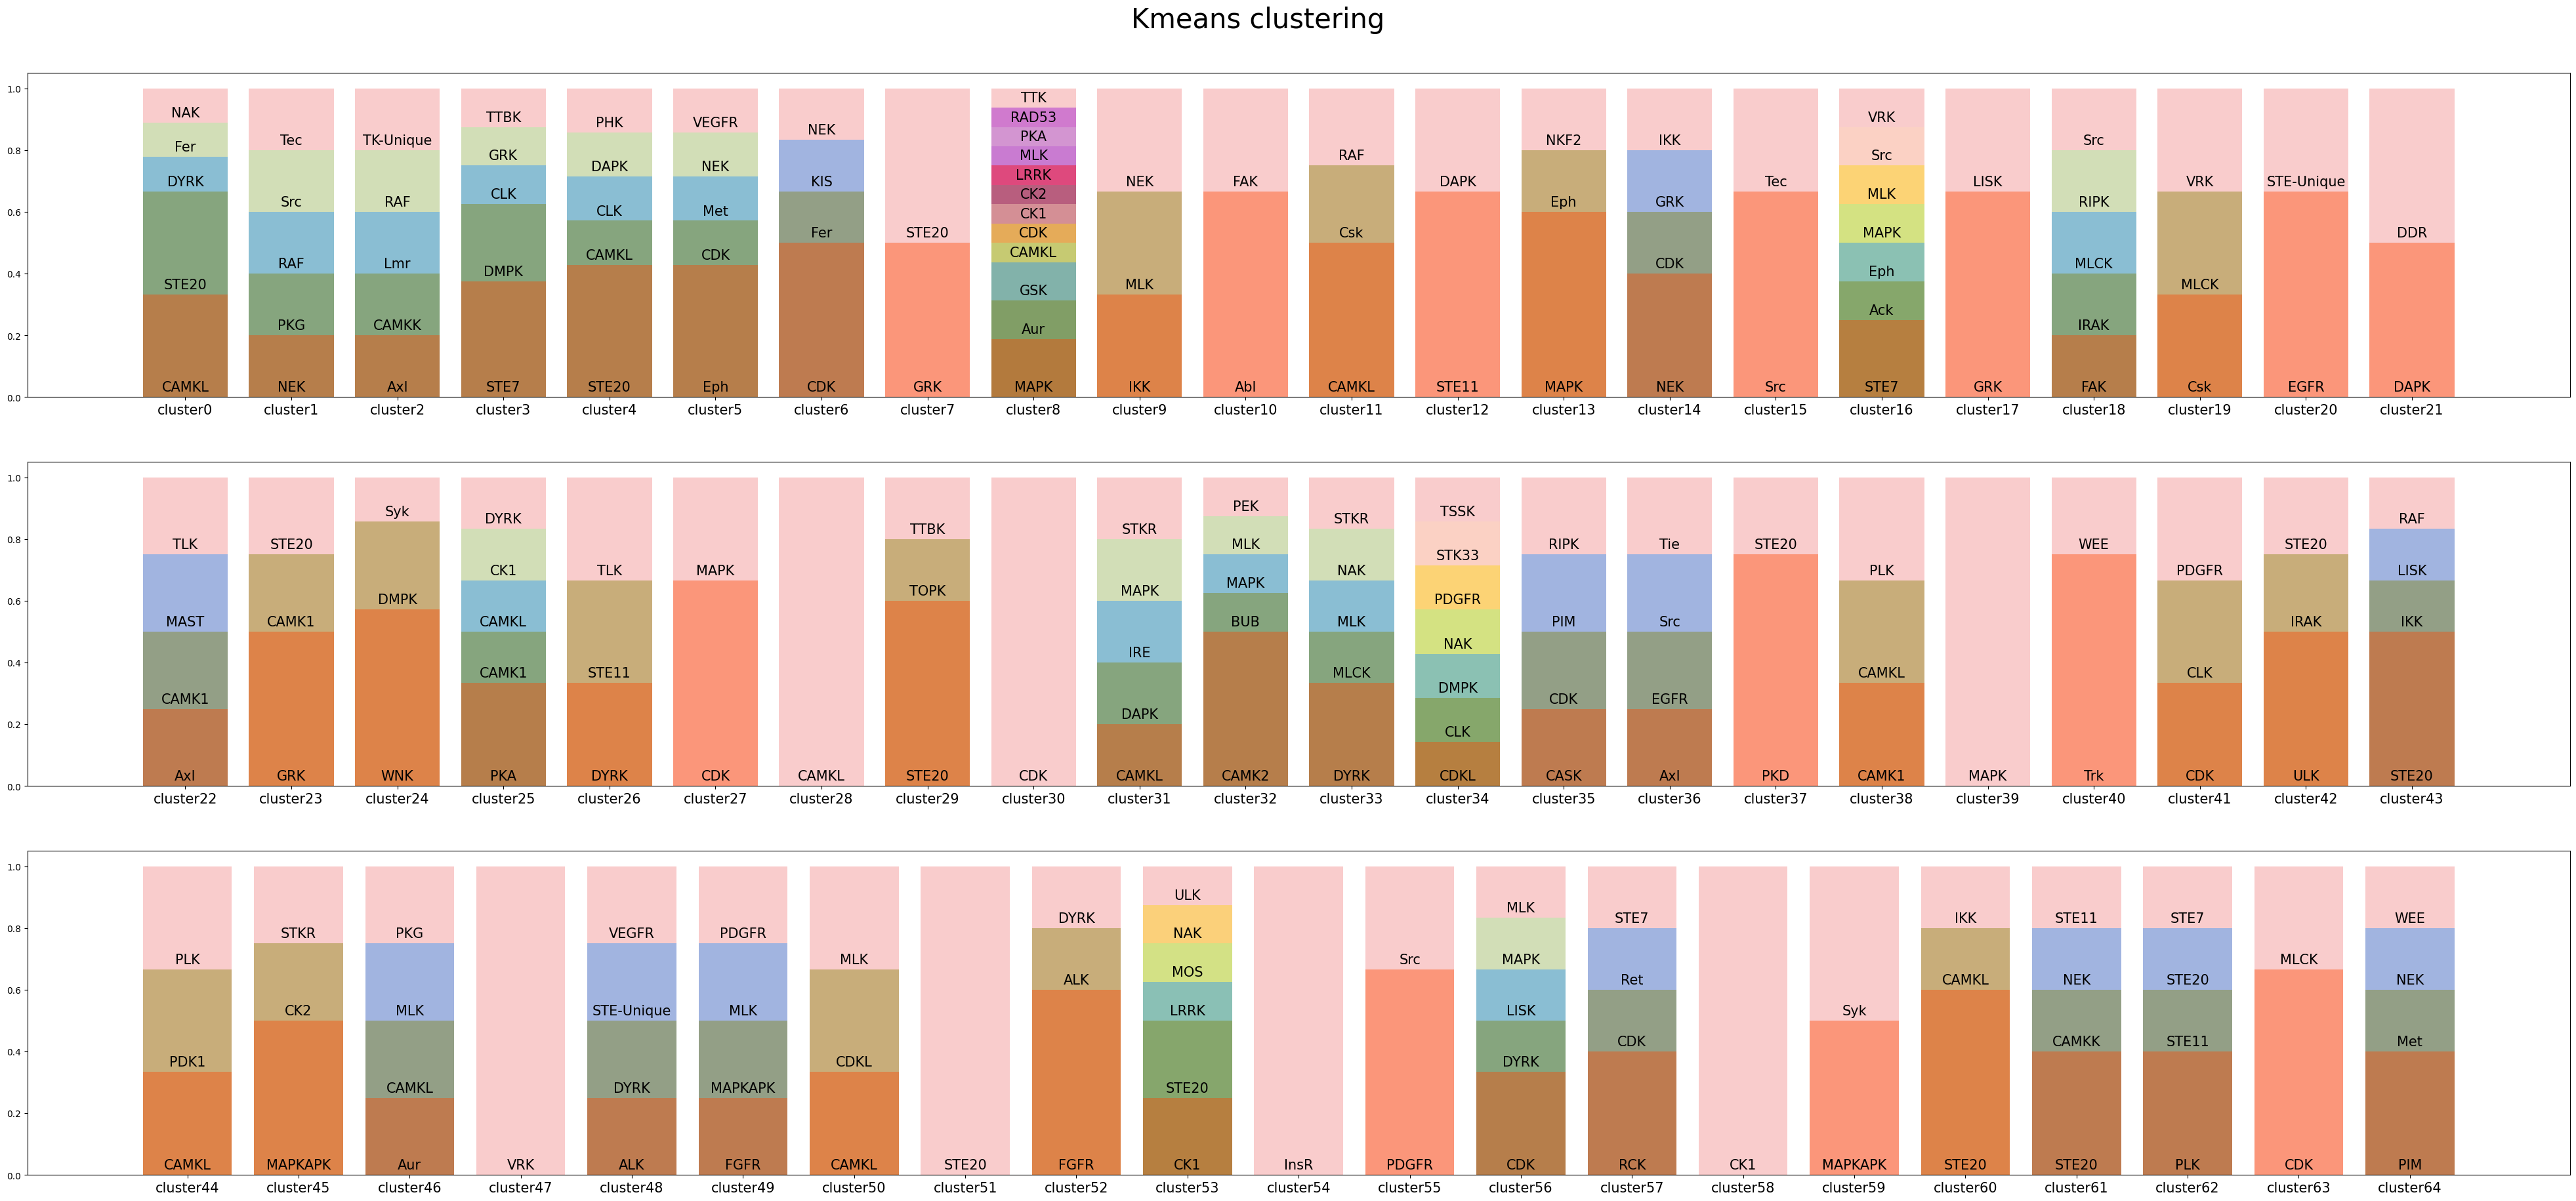

In [418]:
fig, ax = plt.subplots(3, 1,figsize=(50, 20))

fig.suptitle("Kmeans clustering", fontsize=30, va='bottom')
fig.subplots_adjust(top=0.95)
ax[0].set_xticks(np.arange(22))
ax[0].set_xticklabels([x for x in cluster_family_dict.keys()][:22], fontsize=15)
for idx, _cluster in enumerate([x for x in cluster_family_dict.values()][:22]):
    # if idx > 22:
        # pass
    # else:
        _cluster.sort()
        cc = Counter(_cluster).most_common()
        for i, value in enumerate(cc):
            if i == 0:
 
                sum_total = sum([x[1] for x in cc])
                total = sum_total
                ax[0].bar(idx, 1, facecolor=color_list[i], alpha=0.4)
                ax[0].text(idx, 0.01, s=cc[0][0], va='bottom', ha='center', fontsize=15)
            else:
                i = len(cc)-i

                total = total - cc[i][1]
                ax[0].bar(idx, 1/sum_total*total, facecolor=color_list[i], alpha=0.4)
                ax[0].text(x=idx, y=1/sum_total*total+0.01, va='bottom', s=cc[i][0], ha='center', fontsize=15)

ax[1].set_xticks(np.arange(0, 22))
ax[1].set_xticklabels([x for x in cluster_family_dict.keys()][22:44], fontsize=15)
for idx, _cluster in enumerate([x for x in cluster_family_dict.values()][22:44]):
    # if idx > 22:
        # pass
    # else:
        _cluster.sort()
        cc = Counter(_cluster).most_common()
        for i, value in enumerate(cc):
            if i == 0:
 
                sum_total = sum([x[1] for x in cc])
                total = sum_total
                ax[1].bar(idx, 1, facecolor=color_list[i], alpha=0.4)
                ax[1].text(idx, 0.01, s=cc[0][0], va='bottom', ha='center', fontsize=15)
            else:
                i = len(cc)-i

                total = total - cc[i][1]
                ax[1].bar(idx, 1/sum_total*total, facecolor=color_list[i], alpha=0.4)
                ax[1].text(x=idx, y=1/sum_total*total+0.01, va='bottom', s=cc[i][0], ha='center', fontsize=15)


ax[2].set_xticks(np.arange(0, 21))
ax[2].set_xticklabels([x for x in cluster_family_dict.keys()][44:], fontsize=15)
for idx, _cluster in enumerate([x for x in cluster_family_dict.values()][44:]):
    # if idx > 22:
        # pass
    # else:
        _cluster.sort()
        cc = Counter(_cluster).most_common()
        for i, value in enumerate(cc):
            if i == 0:
 
                sum_total = sum([x[1] for x in cc])
                total = sum_total
                ax[2].bar(idx, 1, facecolor=color_list[i], alpha=0.4)
                ax[2].text(idx, 0.01, s=cc[0][0],va='bottom', ha='center', fontsize=15)
            else:
                i = len(cc)-i

                total = total - cc[i][1]
                ax[2].bar(idx, 1/sum_total*total, facecolor=color_list[i], alpha=0.4)
                ax[2].text(x=idx, y=1/sum_total*total+0.01, s=cc[i][0], va='bottom', ha='center', fontsize=15)

3
orangered
6
olive
7
dodgerblue
8
midnightblue
9


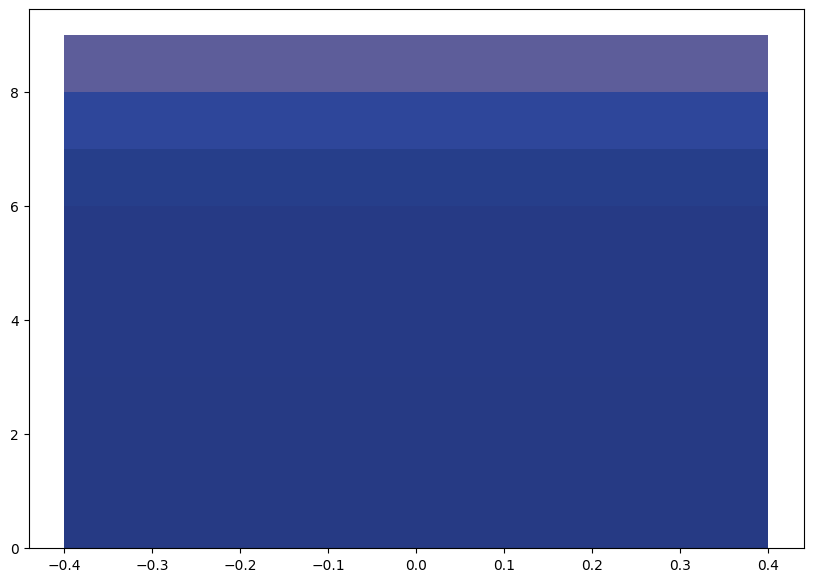

In [283]:
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(len(cc)):
    if i == 0 :
        total = cc[i][1]
        ax.bar(0, cc[i][1], facecolor=color_list[i], alpha=0.7)

        print(total)
    elif i != 0 :
        total += cc[i][1]
        ax.bar(0, total, facecolor=color_list[i], alpha=0.7)
        print(color_list[i])
        print(total)

[Text(0, 0, 'Cluster0'), Text(1, 0, 'Cluster1')]

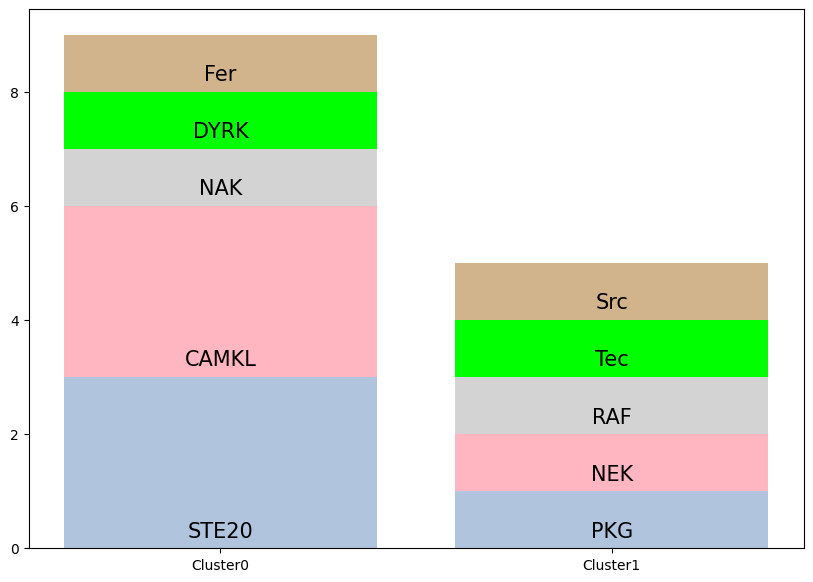

In [259]:
fig, ax = plt.subplots(figsize=(10, 7))
background = len(data)
ax.bar(0, background, facecolor='tan')
ax.bar(0, 8, facecolor='lime')
ax.bar(0, 7, facecolor='lightgrey')
ax.bar(0, 6, facecolor='lightpink')
ax.bar(0, 3, facecolor='lightsteelblue')
ax.text(x=0, y=8.2, s='Fer', ha='center', fontsize=15)
ax.text(x=0, y=7.2, s='DYRK', ha='center', fontsize=15)
ax.text(x=0, y=6.2, s='NAK', ha='center', fontsize=15)
ax.text(x=0, y=3.2, s='CAMKL', ha='center', fontsize=15)
ax.text(x=0, y=0.2, s='STE20', ha='center', fontsize=15)


ax.bar(1, len(cluster_family_dict['cluster1']), facecolor='tan')
ax.bar(1, 4, facecolor='lime')
ax.bar(1, 3, facecolor='lightgrey')
ax.bar(1, 2, facecolor='lightpink')
ax.bar(1, 1, facecolor='lightsteelblue')
ax.text(x=1, y=4.2, s='Src', ha='center', fontsize=15)
ax.text(x=1, y=3.2, s='Tec', ha='center', fontsize=15)
ax.text(x=1, y=2.2, s='RAF', ha='center', fontsize=15)
ax.text(x=1, y=1.2, s='NEK', ha='center', fontsize=15)
ax.text(x=1, y=0.2, s='PKG', ha='center', fontsize=15)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Cluster0', 'Cluster1'])



In [236]:
plt.bar(counter)

TypeError: bar() missing 1 required positional argument: 'height'

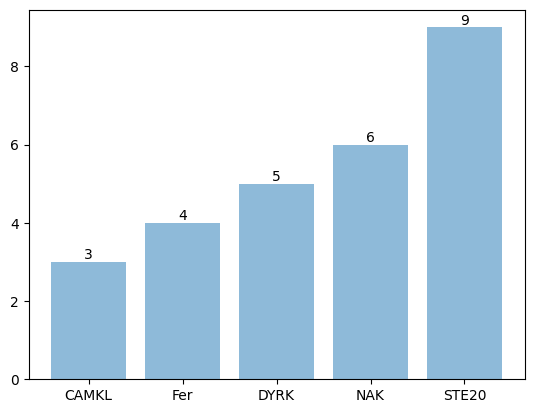

In [230]:
import matplotlib.pyplot as plt
from collections import Counter

data = ['CAMKL', 'Fer', 'DYRK', 'CAMKL', 'NAK', 'CAMKL', 'STE20', 'STE20', 'STE20']

# 각 요소의 개수를 세기 위해 Counter를 사용합니다.
counter = Counter(data)

# 요소와 해당 개수를 분리합니다.
labels, counts = zip(*counter.items())

# 누적 개수를 계산합니다.
cumulative_counts = [sum(counts[:i+1]) for i in range(len(counts))]

# 하나의 막대 그래프로 누적 막대 그래프를 그립니다.
plt.bar(range(len(counts)), cumulative_counts, align='center', alpha=0.5)

# x축에 요소 이름을 설정합니다.
plt.xticks(range(len(labels)), labels)

# 그래프에 레이블을 추가합니다.
for i, count in enumerate(cumulative_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# 그래프를 보여줍니다.
plt.show()


AttributeError: Rectangle.set() got an unexpected keyword argument 'stacked'

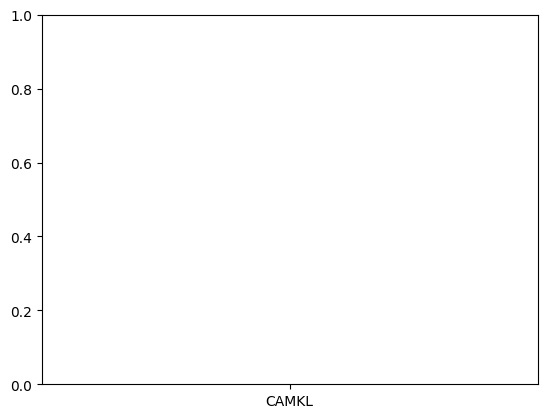

In [228]:
import matplotlib.pyplot as plt
from collections import Counter

data = ['CAMKL', 'Fer', 'DYRK', 'CAMKL', 'NAK', 'CAMKL', 'STE20', 'STE20', 'STE20']
data = cluster_family_dict['cluster0']
# 각 항목에 대한 빈도를 계산합니다.
counter = Counter(data)

# 누적 막대그래프를 그리기 위한 데이터를 준비합니다.
labels = list(counter.keys())
frequency = list(counter.values())
cumulative_frequency = [sum(frequency[:i+1]) for i in range(len(frequency))]

# 누적 막대그래프를 그립니다.
fig, ax = plt.subplots()
ax.bar(labels, cumulative_frequency, stacked=True)

ax.set_ylabel('누적 빈도')
ax.set_xlabel('항목')
ax.set_title('누적 막대그래프 예시')

plt.show()



In [225]:
plt.bar(cluster_family_dict['cluster0'])

TypeError: bar() missing 1 required positional argument: 'height'

In [224]:
cluster_family_dict['cluster0'].plo

['CAMKL', 'Fer', 'DYRK', 'CAMKL', 'NAK', 'CAMKL', 'STE20', 'STE20', 'STE20']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster0.plot.bar(x=0, )

In [152]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import math

clustering_result = pd.DataFrame(columns=['scaling', 'clustering', 'num_clusters', 'silhouette', 'calinski_harabasz', 'davies_bouldin'])

SCAILING_METHOD = 'sd_aavg'
CLUSTERING_METHOD = 'KMeans'
for i in range(2, 83):
    
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(cormatrix)
    labels = kmeans.labels_
    _num_clusters = len(set(labels))
    _silhouette_score = round(silhouette_score(cormatrix, labels, metric='euclidean'),2)
    _calinski_harabasz_score = round(calinski_harabasz_score(cormatrix, labels) , 2)
    _davies_bouldin_score = round(davies_bouldin_score(cormatrix, labels), 2)
    _result = [SCAILING_METHOD, CLUSTERING_METHOD, _num_clusters, _silhouette_score, _calinski_harabasz_score, _davies_bouldin_score]
    _result = pd.DataFrame([_result], columns=['scaling', 'clustering', 'num_clusters', 'silhouette', 'calinski_harabasz', 'davies_bouldin'])
    clustering_result = pd.concat([clustering_result, _result], axis=0)

In [155]:
from sklearn.cluster import AffinityPropagation
SCAILING_METHOD = 'sd_aavg'
CLUSTERING_METHOD = 'AffinityPropagation'
for pref in range(-80, -1, 5):

    affinityPropagation = AffinityPropagation(preference=pref, random_state=0)
    affinityPropagation.fit(cormatrix)
    labels = affinityPropagation.labels_
    _num_clusters = len(set(labels))
    _silhouette_score = round(silhouette_score(cormatrix, labels, metric='euclidean'), 2)
    _calinski_harabasz_score = round(calinski_harabasz_score(cormatrix, labels), 2)
    _davies_bouldin_score = round(davies_bouldin_score(cormatrix, labels), 2)
    _result = [SCAILING_METHOD, CLUSTERING_METHOD, _num_clusters, _silhouette_score, _calinski_harabasz_score, _davies_bouldin_score]
    _result = pd.DataFrame([_result], columns=['scaling', 'clustering', 'num_clusters', 'silhouette', 'calinski_harabasz', 'davies_bouldin'])
    clustering_result = pd.concat([clustering_result, _result], axis=0)

In [156]:
from sklearn.cluster import estimate_bandwidth, MeanShift
# bandwith = estimate_bandwidth(cormatrix)
# bandwith
CLUSTERING_METHOD = 'MeanShift'
for bandwith in np.arange(2.3, 3, 0.1):
    meanshift = MeanShift(bandwidth=2.3, )
    meanshift.fit(cormatrix)
    labels = meanshift.labels_
    _num_clusters = len(set(labels))
    _silhouette_score = round(silhouette_score(cormatrix, labels, metric='euclidean'), 2)
    _calinski_harabasz_score = round(calinski_harabasz_score(cormatrix, labels), 2)
    _davies_bouldin_score = round(davies_bouldin_score(cormatrix, labels), 2)
    _result = [SCAILING_METHOD, CLUSTERING_METHOD, _num_clusters, _silhouette_score, _calinski_harabasz_score, _davies_bouldin_score]
    _result = pd.DataFrame([_result], columns=['scaling', 'clustering', 'num_clusters', 'silhouette', 'calinski_harabasz', 'davies_bouldin'])
    clustering_result = pd.concat([clustering_result, _result], axis=0)

In [157]:
from sklearn.cluster import SpectralClustering

SCAILING_METHOD = 'sd_aavg'
CLUSTERING_METHOD = 'SpectralClustering'
for i in range(2, 83):
    
    spectralClustering = SpectralClustering(n_clusters=i, n_init=10)
    spectralClustering.fit(cormatrix)
    labels = spectralClustering.labels_
    _num_clusters = len(set(labels))
    _silhouette_score = round(silhouette_score(cormatrix, labels, metric='euclidean'),2)
    _calinski_harabasz_score = round(calinski_harabasz_score(cormatrix, labels) , 2)
    _davies_bouldin_score = round(davies_bouldin_score(cormatrix, labels), 2)
    _result = [SCAILING_METHOD, CLUSTERING_METHOD, _num_clusters, _silhouette_score, _calinski_harabasz_score, _davies_bouldin_score]
    _result = pd.DataFrame([_result], columns=['scaling', 'clustering', 'num_clusters', 'silhouette', 'calinski_harabasz', 'davies_bouldin'])
    clustering_result = pd.concat([clustering_result, _result], axis=0)

In [158]:
from sklearn.cluster import AgglomerativeClustering

SCAILING_METHOD = 'sd_aavg'
CLUSTERING_METHOD = 'AgglomerativeClustering'
for i in range(2, 83):

    agglomerativeClustering = AgglomerativeClustering(n_clusters=i, )
    agglomerativeClustering.fit(cormatrix)
    labels = agglomerativeClustering.labels_
    _num_clusters = len(set(labels))
    _silhouette_score = round(silhouette_score(cormatrix, labels, metric='euclidean'),2)
    _calinski_harabasz_score = round(calinski_harabasz_score(cormatrix, labels) , 2)
    _davies_bouldin_score = round(davies_bouldin_score(cormatrix, labels), 2)
    _result = [SCAILING_METHOD, CLUSTERING_METHOD, _num_clusters, _silhouette_score, _calinski_harabasz_score, _davies_bouldin_score]
    _result = pd.DataFrame([_result], columns=['scaling', 'clustering', 'num_clusters', 'silhouette', 'calinski_harabasz', 'davies_bouldin'])
    clustering_result = pd.concat([clustering_result, _result], axis=0)

In [159]:
from sklearn.cluster import DBSCAN

SCAILING_METHOD = 'sd_aavg'
CLUSTERING_METHOD = 'DBSCAN'
for _eps in np.arange(2.38, 2.65, 0.01):

    dbscan = DBSCAN(eps=_eps, min_samples=1)
    dbscan.fit(cormatrix)
    labels = dbscan.labels_
    _num_clusters = len(set(labels))
    _silhouette_score = round(silhouette_score(cormatrix, labels, metric='euclidean'),2)
    _calinski_harabasz_score = round(calinski_harabasz_score(cormatrix, labels) , 2)
    _davies_bouldin_score = round(davies_bouldin_score(cormatrix, labels), 2)
    _result = [SCAILING_METHOD, CLUSTERING_METHOD, _num_clusters, _silhouette_score, _calinski_harabasz_score, _davies_bouldin_score]
    _result = pd.DataFrame([_result], columns=['scaling', 'clustering', 'num_clusters', 'silhouette', 'calinski_harabasz', 'davies_bouldin'])
    clustering_result = pd.concat([clustering_result, _result], axis=0)

# cluster = DBSCAN(eps=2.38, min_samples=1).fit(cormatrix)
# len(set(cluster.labels_))

In [160]:
clustering_result.reset_index(drop=True, inplace=True)
clustering_result

,scaling,clustering,num_clusters,silhouette,calinski_harabasz,davies_bouldin
0,sd_aavg,KMeans,2,0.26,53.23,2.18
1,sd_aavg,KMeans,3,0.06,38.92,2.40
2,sd_aavg,KMeans,4,0.08,32.16,2.53
3,sd_aavg,KMeans,5,0.08,28.12,2.26
4,sd_aavg,KMeans,6,0.08,25.23,2.25
...,...,...,...,...,...,...
289,sd_aavg,DBSCAN,291,0.02,2581.91,0.02
290,sd_aavg,DBSCAN,291,0.02,2581.91,0.02
291,sd_aavg,DBSCAN,291,0.02,2581.91,0.02
292,sd_aavg,DBSCAN,291,0.02,2581.91,0.02


In [161]:
clustering_result.to_csv('clustering_result_by_gradcam.csv')

In [116]:

cluster = DBSCAN(eps=2.65, min_samples=1).fit(cormatrix)
len(set(cluster.labels_))

12

In [87]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# tdm_df=pd.read_csv('fashion_count_tdm.csv',encoding='utf-8')

# 분류 확인 시각화
# from sklearn.cluster import AgglomerativeClustering
# cluster=AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage='ward')
# cluster.fit_predict(tdm_df)
# plt.figure(figsize=(10,7))
# plt.scatter(tdm_df.iloc[:,10],tdm_df.iloc[:,100],c=cluster.labels_,cmap='rainbow')
# plt.show()
tdm_df = cormatrix
# dendrogram 그리기
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(100,30))
plt.title('video type dendograms')
dend=shc.dendrogram(shc.linkage(tdm_df,method='ward')) #method 설정 가능
tdm_df.iloc[:,0]
plt.close()
# n개 군집까지 클러스터링 하기
predict=pd.DataFrame(shc.fcluster(shc.linkage(tdm_df, method='ward'),10,criterion='distance'))
predict.columns = ['cluster']
predict

,cluster
0,8
1,5
2,5
3,5
4,2
...,...
297,8
298,7
299,1
300,2


In [88]:
tdm_df['cluster'] = np.array(predict['cluster'])
tdm_df.to_csv("cluster_by_gradcam.csv")

In [91]:
fam = [famdict[x] for x in tdm_df.index]
tdm_df['family'] = fam

In [93]:
_df_fam = tdm_df[tdm_df['family']=='NAK']
_df_fam

kinase,AAK1,ABL1,ABL2,ACK,ALK,AMPKa1,AMPKa2,ARAF,AXL,AurA,...,ZAP70,caMLCK,p38a,p38b,p38d,p38g,skMLCK,smMLCK,cluster,family
kinase,,,,,,,,,,,,,,,,,,,,,
AAK1,1.000000,-0.316063,-0.272546,-0.101914,-0.313361,0.002529,0.332314,0.210186,-0.148263,-0.128727,...,0.015459,0.396777,0.040632,0.213636,0.556864,0.161438,-0.119224,0.224097,8,NAK
BIKE,0.299164,-0.197624,-0.225550,-0.107462,-0.056476,0.073295,0.353733,0.210498,-0.244010,-0.200122,...,0.099413,0.092134,-0.106308,-0.017081,0.397940,-0.013006,-0.179885,0.278104,7,NAK
GAK,0.187471,-0.158048,-0.044106,0.216839,-0.100982,-0.075583,0.190039,0.164957,0.028807,0.010524,...,0.346513,-0.013686,0.136908,0.031979,0.216744,0.155101,-0.024506,0.326640,6,NAK
MPSK1,0.351346,-0.069129,-0.062492,0.207219,-0.042393,0.337087,0.471325,0.072546,0.012554,0.016326,...,-0.133283,0.088216,0.208790,0.129036,0.261808,0.199915,0.028990,0.146597,1,NAK


In [107]:
_df['cluster'].value_counts().to_dict()

{5: 4}

In [117]:
tt

kinase
AAK1        4
ABL1      435
ABL2       46
ACK        14
ALK        22
         ... 
p38b       54
p38d       38
p38g       46
skMLCK      2
smMLCK      6
Name: counts, Length: 302, dtype: int64

In [137]:
fam_cluster_dict = {}
for _family in tdm_df.family.unique():    
    fam_cluster_dict[_family] = {}
    _df = tdm_df[tdm_df['family']==_family]

    for _index, _cluster, _counts in zip(_df.index, _df['cluster'], _df['counts']):    
        fam_cluster_dict[_family][_index] = {'cluster':_cluster, 'counts': _counts}

In [143]:
len(tdm_df.cluster.unique())

13

In [146]:
fam_cluster_dict['NAK']

{'AAK1': {'cluster': 8, 'counts': 4},
 'BIKE': {'cluster': 7, 'counts': 2},
 'GAK': {'cluster': 6, 'counts': 6},
 'MPSK1': {'cluster': 1, 'counts': 10}}

In [140]:
fam_cluster_dict['Abl']

{'ABL1': {'cluster': 5, 'counts': 435}, 'ABL2': {'cluster': 5, 'counts': 46}}

In [147]:
fam_cluster_dict.keys()

dict_keys(['NAK', 'Abl', 'Ack', 'ALK', 'CAMKL', 'RAF', 'Axl', 'Aur', 'GRK', 'Src', 'STKR', 'Tec', 'BUB', 'CASK', 'CDK', 'CDKL', 'RAD53', 'CK1', 'CK2', 'CLK', 'STE-Unique', 'DMPK', 'Csk', 'CAMK1', 'CAMK2', 'CAMKK', 'DAPK', 'DDR', 'MLK', 'DYRK', 'EGFR', 'Eph', 'MAPK', 'FAK', 'Fer', 'FGFR', 'VEGFR', 'PDGFR', 'STE20', 'GSK', 'RCK', 'InsR', 'IKK', 'IRAK', 'IRE', 'KIS', 'LISK', 'Lmr', 'LRRK', 'STE7', 'STE11', 'MAPKAPK', 'MAST', 'Met', 'MOS', 'WEE', 'NEK', 'TOPK', 'PDK1', 'PHK', 'PIM', 'NKF2', 'PKA', 'PKD', 'PKG', 'PEK', 'PLK', 'Ret', 'RIPK', 'STK33', 'Syk', 'TK-Unique', 'Tie', 'TLK', 'Trk', 'TSSK', 'TTBK', 'TTK', 'MLCK', 'ULK', 'VRK', 'WNK'])

In [156]:
over_num2 = {}
for i in fam_cluster_dict.keys():
    kk = fam_cluster_dict[i]
    if len(kk) > 1:
        over_num2[i] = kk

In [158]:
over_num2.keys()

dict_keys(['NAK', 'Abl', 'ALK', 'CAMKL', 'RAF', 'Axl', 'Aur', 'GRK', 'Src', 'STKR', 'Tec', 'CDK', 'CDKL', 'CK1', 'CK2', 'CLK', 'STE-Unique', 'DMPK', 'Csk', 'CAMK1', 'CAMK2', 'CAMKK', 'DAPK', 'MLK', 'DYRK', 'EGFR', 'Eph', 'MAPK', 'FAK', 'Fer', 'FGFR', 'VEGFR', 'PDGFR', 'STE20', 'GSK', 'RCK', 'InsR', 'IKK', 'IRAK', 'LISK', 'LRRK', 'STE7', 'STE11', 'MAPKAPK', 'Met', 'WEE', 'NEK', 'PIM', 'PKA', 'PKD', 'PKG', 'PLK', 'RIPK', 'Syk', 'TLK', 'Trk', 'TTBK', 'MLCK', 'ULK', 'VRK', 'WNK'])

In [163]:
over_num2['GRK']

{'BARK1': {'cluster': 2, 'counts': 149},
 'BARK2': {'cluster': 2, 'counts': 42},
 'GPRK4': {'cluster': 7, 'counts': 6},
 'GPRK5': {'cluster': 11, 'counts': 34},
 'GPRK6': {'cluster': 11, 'counts': 24},
 'GPRK7': {'cluster': 12, 'counts': 2},
 'RHOK': {'cluster': 1, 'counts': 24}}

In [164]:
over_num2['NAK']

{'AAK1': {'cluster': 8, 'counts': 4},
 'BIKE': {'cluster': 7, 'counts': 2},
 'GAK': {'cluster': 6, 'counts': 6},
 'MPSK1': {'cluster': 1, 'counts': 10}}

In [165]:
over_num2['WNK']

{'Wnk1': {'cluster': 5, 'counts': 16},
 'Wnk2': {'cluster': 5, 'counts': 6},
 'Wnk3': {'cluster': 5, 'counts': 8},
 'Wnk4': {'cluster': 5, 'counts': 6}}

In [155]:
len(kk)

4

In [148]:
fam_cluster_dict['Ack']

{'ACK': {'cluster': 5, 'counts': 14}}

In [135]:
fam_cluster_dict['ex'] = {}
for _index, _cluster, _counts in zip(_df.index, _df['cluster'], _df['counts']):
    
    fam_cluster_dict['ex'][_index] = {'cluster':_cluster, 'counts': _counts}
    fam_cluster_dict

In [136]:
fam_cluster_dict['ex']

{'Wnk1': {'cluster': 5, 'counts': 16},
 'Wnk2': {'cluster': 5, 'counts': 6},
 'Wnk3': {'cluster': 5, 'counts': 8},
 'Wnk4': {'cluster': 5, 'counts': 6}}

In [123]:
counts_by_kinase = [tt[i] for i in tdm_df.index]
counts_by_kinase

[4,
 435,
 46,
 14,
 22,
 342,
 96,
 6,
 21,
 236,
 306,
 14,
 149,
 42,
 2,
 12,
 12,
 38,
 20,
 37,
 14,
 12,
 40,
 42,
 10,
 4,
 1212,
 4,
 8,
 762,
 32,
 156,
 382,
 90,
 95,
 36,
 76,
 2,
 32,
 335,
 114,
 288,
 2,
 184,
 108,
 4,
 10,
 1160,
 40,
 28,
 6,
 2,
 2,
 43,
 6,
 10,
 8,
 4,
 54,
 8,
 2,
 410,
 20,
 40,
 12,
 16,
 12,
 10,
 40,
 4,
 42,
 4,
 4,
 2,
 2,
 78,
 20,
 80,
 4,
 2,
 192,
 2,
 2,
 6,
 4,
 6,
 34,
 6,
 834,
 957,
 2,
 2,
 62,
 24,
 46,
 20,
 12,
 62,
 10,
 14,
 4,
 26,
 10,
 6,
 8,
 4,
 312,
 6,
 6,
 6,
 34,
 24,
 2,
 154,
 729,
 49,
 17,
 4,
 4,
 102,
 2,
 12,
 2,
 8,
 36,
 92,
 187,
 74,
 22,
 80,
 8,
 48,
 2,
 22,
 368,
 140,
 42,
 4,
 2,
 8,
 10,
 28,
 2,
 198,
 4,
 4,
 76,
 4,
 5,
 28,
 165,
 2,
 190,
 2,
 4,
 40,
 6,
 16,
 10,
 4,
 22,
 12,
 12,
 8,
 18,
 40,
 4,
 162,
 4,
 16,
 26,
 58,
 20,
 8,
 2,
 54,
 17,
 42,
 12,
 14,
 22,
 2,
 8,
 6,
 10,
 2,
 64,
 56,
 12,
 24,
 10,
 4,
 10,
 6,
 64,
 4,
 12,
 48,
 14,
 10,
 32,
 36,
 24,
 2,
 22,
 138,
 70,
 2,
 

In [124]:
tdm_df['counts'] = counts_by_kinase

In [118]:
_df['cluster']

kinase
Wnk1    5
Wnk2    5
Wnk3    5
Wnk4    5
Name: cluster, dtype: int32

In [109]:
fam_cluster_dict

{'NAK': {8: 1, 7: 1, 6: 1, 1: 1},
 'Abl': {5: 2},
 'Ack': {5: 1},
 'ALK': {2: 1, 13: 1},
 'CAMKL': {1: 4, 7: 4, 6: 3, 13: 3, 3: 1, 10: 1, 11: 1, 4: 1},
 'RAF': {12: 2, 10: 1, 5: 1},
 'Axl': {5: 1, 10: 1, 9: 1},
 'Aur': {3: 2, 1: 1},
 'GRK': {2: 2, 11: 2, 7: 1, 12: 1, 1: 1},
 'Src': {10: 8, 5: 1, 9: 1, 4: 1},
 'STKR': {7: 1, 1: 1, 13: 1},
 'Tec': {10: 3, 9: 1},
 'BUB': {7: 1},
 'CASK': {11: 1},
 'CDK': {2: 8, 1: 3, 13: 2, 10: 2, 11: 2, 3: 1},
 'CDKL': {12: 1, 6: 1},
 'RAD53': {3: 1},
 'CK1': {12: 3, 3: 1, 1: 1, 6: 1},
 'CK2': {3: 1, 8: 1},
 'CLK': {8: 1, 12: 1, 13: 1, 7: 1},
 'STE-Unique': {9: 1, 13: 1},
 'DMPK': {7: 3, 5: 2},
 'Csk': {13: 1, 6: 1},
 'CAMK1': {1: 2, 12: 1, 10: 1},
 'CAMK2': {6: 4},
 'CAMKK': {5: 1, 10: 1},
 'DAPK': {13: 2, 4: 1, 6: 1},
 'DDR': {13: 1},
 'MLK': {13: 3, 1: 2, 6: 2, 5: 1, 7: 1},
 'DYRK': {1: 3, 8: 2, 2: 1, 13: 1, 6: 1},
 'EGFR': {9: 3},
 'Eph': {10: 3, 1: 1, 5: 1},
 'MAPK': {1: 4, 3: 3, 6: 3, 5: 1, 2: 1, 8: 1, 7: 1},
 'FAK': {4: 2},
 'Fer': {6: 1, 2: 1},
 

In [80]:
_df_fam

kinase,AAK1,ABL1,ABL2,ACK,ALK,AMPKa1,AMPKa2,ARAF,AXL,AurA,...,ZAP70,caMLCK,p38a,p38b,p38d,p38g,skMLCK,smMLCK,cluster,family
kinase,,,,,,,,,,,,,,,,,,,,,
AAK1,1.000000,-0.316063,-0.272546,-0.101914,-0.313361,0.002529,0.332314,0.210186,-0.148263,-0.128727,...,0.015459,0.396777,0.040632,0.213636,0.556864,0.161438,-0.119224,0.224097,43,NAK
BIKE,0.299164,-0.197624,-0.225550,-0.107462,-0.056476,0.073295,0.353733,0.210498,-0.244010,-0.200122,...,0.099413,0.092134,-0.106308,-0.017081,0.397940,-0.013006,-0.179885,0.278104,36,NAK
GAK,0.187471,-0.158048,-0.044106,0.216839,-0.100982,-0.075583,0.190039,0.164957,0.028807,0.010524,...,0.346513,-0.013686,0.136908,0.031979,0.216744,0.155101,-0.024506,0.326640,29,NAK
MPSK1,0.351346,-0.069129,-0.062492,0.207219,-0.042393,0.337087,0.471325,0.072546,0.012554,0.016326,...,-0.133283,0.088216,0.208790,0.129036,0.261808,0.199915,0.028990,0.146597,6,NAK


In [77]:
_df_fam

kinase,AAK1,ABL1,ABL2,ACK,ALK,AMPKa1,AMPKa2,ARAF,AXL,AurA,...,ZAK,ZAP70,caMLCK,p38a,p38b,p38d,p38g,skMLCK,smMLCK,cluster
family,,,,,,,,,,,,,,,,,,,,,
ALK,-0.321194,0.333788,0.486146,-0.230085,1.312714,0.072452,0.024182,0.026858,-0.033622,0.093035,...,-0.287176,0.118759,-0.202868,0.004856,-0.483764,-0.256508,0.016708,-0.072485,-0.054794,77
Abl,-0.588609,1.884805,1.884805,-0.068478,0.669551,0.213435,-0.327132,-0.979754,0.200998,0.540279,...,-0.353667,-0.129304,-0.411217,0.478975,0.134139,-0.740047,0.141401,0.183641,-0.450753,44
Ack,-0.101914,-0.019651,-0.048827,1.000000,-0.037337,0.496747,0.147139,-0.127502,0.225317,0.141839,...,-0.305483,0.070660,-0.061446,0.219969,0.273398,-0.206214,0.038783,0.280068,0.097157,26
Aur,-0.087795,0.245882,0.509310,0.263406,0.546878,0.266523,0.087234,-0.308472,0.247185,1.828493,...,-0.588445,-0.004018,-0.397445,1.838006,0.067877,-0.577857,0.229845,0.081551,-0.071385,37
Axl,0.123072,-0.160571,-0.244306,0.812086,-0.209331,0.423016,0.030899,-0.089754,1.088040,0.082682,...,-0.231353,0.047626,-0.108838,0.155062,0.136647,-0.243537,0.319482,0.163878,-0.102293,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ULK,-0.087569,0.404418,0.279857,0.338277,0.243164,0.037030,-0.190911,-0.032027,0.408412,0.517006,...,-0.359243,0.314732,-0.185177,0.627825,0.825782,0.029942,-0.548303,-0.419013,0.095501,71
VEGFR,-0.255351,-0.306253,-0.199814,0.032846,0.053959,-0.352432,-0.073930,0.458039,-0.116470,-0.225370,...,-0.042223,0.234415,-0.031982,-0.339471,-0.229583,-0.091398,-0.040568,0.154489,0.048364,117
VRK,0.165633,-0.490818,-0.463861,0.373065,-0.057830,-0.391298,-0.286811,0.416551,0.070130,0.147247,...,0.276877,0.351240,0.161468,0.128965,0.303221,0.247143,0.022644,-0.208465,0.381368,144


In [69]:
tdm_df[tdm_df['cluster']==2]

kinase,AAK1,ABL1,ABL2,ACK,ALK,AMPKa1,AMPKa2,ARAF,AXL,AurA,...,ZAP70,caMLCK,p38a,p38b,p38d,p38g,skMLCK,smMLCK,cluster,family
kinase,,,,,,,,,,,,,,,,,,,,,
CaMK1b,0.297748,-0.070354,0.013745,0.115960,0.013619,0.096598,0.352597,0.132016,-0.019033,0.053076,...,-0.088543,0.242438,0.234601,0.031157,0.072485,0.442904,0.011964,0.242672,2,CAMK1
EphA1,0.034134,-0.087516,-0.031851,0.302343,-0.036545,0.090171,0.310799,0.045788,0.006881,-0.015322,...,-0.022695,0.164921,0.113759,-0.036382,-0.038765,0.406829,0.090949,0.271376,2,Eph
GCK,0.192063,-0.212465,-0.218803,0.272327,-0.083235,0.105094,0.185086,0.063042,0.135959,-0.013023,...,-0.186964,0.053570,0.090965,0.104993,-0.106799,0.176935,0.123539,0.104608,2,STE20
LKB1,0.316585,-0.138420,-0.121688,0.097258,-0.109612,-0.065298,0.289227,0.127183,0.099216,0.032900,...,-0.114712,0.192602,0.202911,0.136812,0.227043,0.325746,0.048076,0.359728,2,CAMKL
p38g,0.161438,0.029054,0.112347,0.038783,-0.013043,0.071097,0.281521,-0.070932,-0.036645,-0.061717,...,-0.147738,0.248034,0.111451,-0.150256,0.217778,1.000000,0.128039,0.188968,2,MAPK


In [59]:
famdict

{'ABL1': 'Abl',
 'ACK': 'Ack',
 'ACTR2': 'STKR',
 'ACTR2B': 'STKR',
 'ADCK4': 'ABC1',
 'Trb1': 'Trbl',
 'BRSK2': 'CAMKL',
 'Wnk2': 'WNK',
 'AKT1': 'Akt',
 'AKT2': 'Akt',
 'AKT3': 'Akt',
 'CaMK1g': 'CAMK1',
 'ALK': 'ALK',
 'ALK\xa01': 'STKR',
 'ALK\xa02': 'STKR',
 'BMPR1A': 'STKR',
 'ALK\xa04': 'STKR',
 'TGFbR1': 'STKR',
 'BMPR1B': 'STKR',
 'AMPKa1': 'CAMKL',
 'AMPKa2': 'CAMKL',
 'ANPa': 'RGC',
 'ANPb': 'RGC',
 'ARAF': 'RAF',
 'ABL2': 'Abl',
 'ATM': 'PIKK',
 'ATR': 'PIKK',
 'AurC': 'Aur',
 'AXL': 'Axl',
 'BARK1': 'GRK',
 'BCKDK': 'PDHK',
 'GCK': 'STE20',
 'BLK': 'Src',
 'BRAF': 'RAF',
 'BRK': 'Src',
 'BTK': 'Tec',
 'BUBR1': 'BUB',
 'CDK7': 'CDK',
 'CaMK1a': 'CAMK1',
 'CaMK2a': 'CAMK2',
 'CaMK2b': 'CAMK2',
 'CaMK2g': 'CAMK2',
 'CaMK4': 'CAMK1',
 'VACAMKL': 'CAMK-Unique',
 'DCAMKL1': 'DCAMKL',
 'CASK': 'CASK',
 'CDC2': 'CDK',
 'CDC7': 'CDC7',
 'CDK2': 'CDK',
 'CDK3': 'CDK',
 'CDK4': 'CDK',
 'CDK5': 'CDK',
 'CDK6': 'CDK',
 'CDK8': 'CDK',
 'PKG1': 'PKG',
 'PKG2': 'PKG',
 'CHED': 'CDK',
 'CH

In [28]:
cluster_num = 10
link = shc.linkage(corr_matrix.avg_gc_sd_aavg, )
predict_df = pd.DataFrame(shc.fcluster(link, cluster_num))

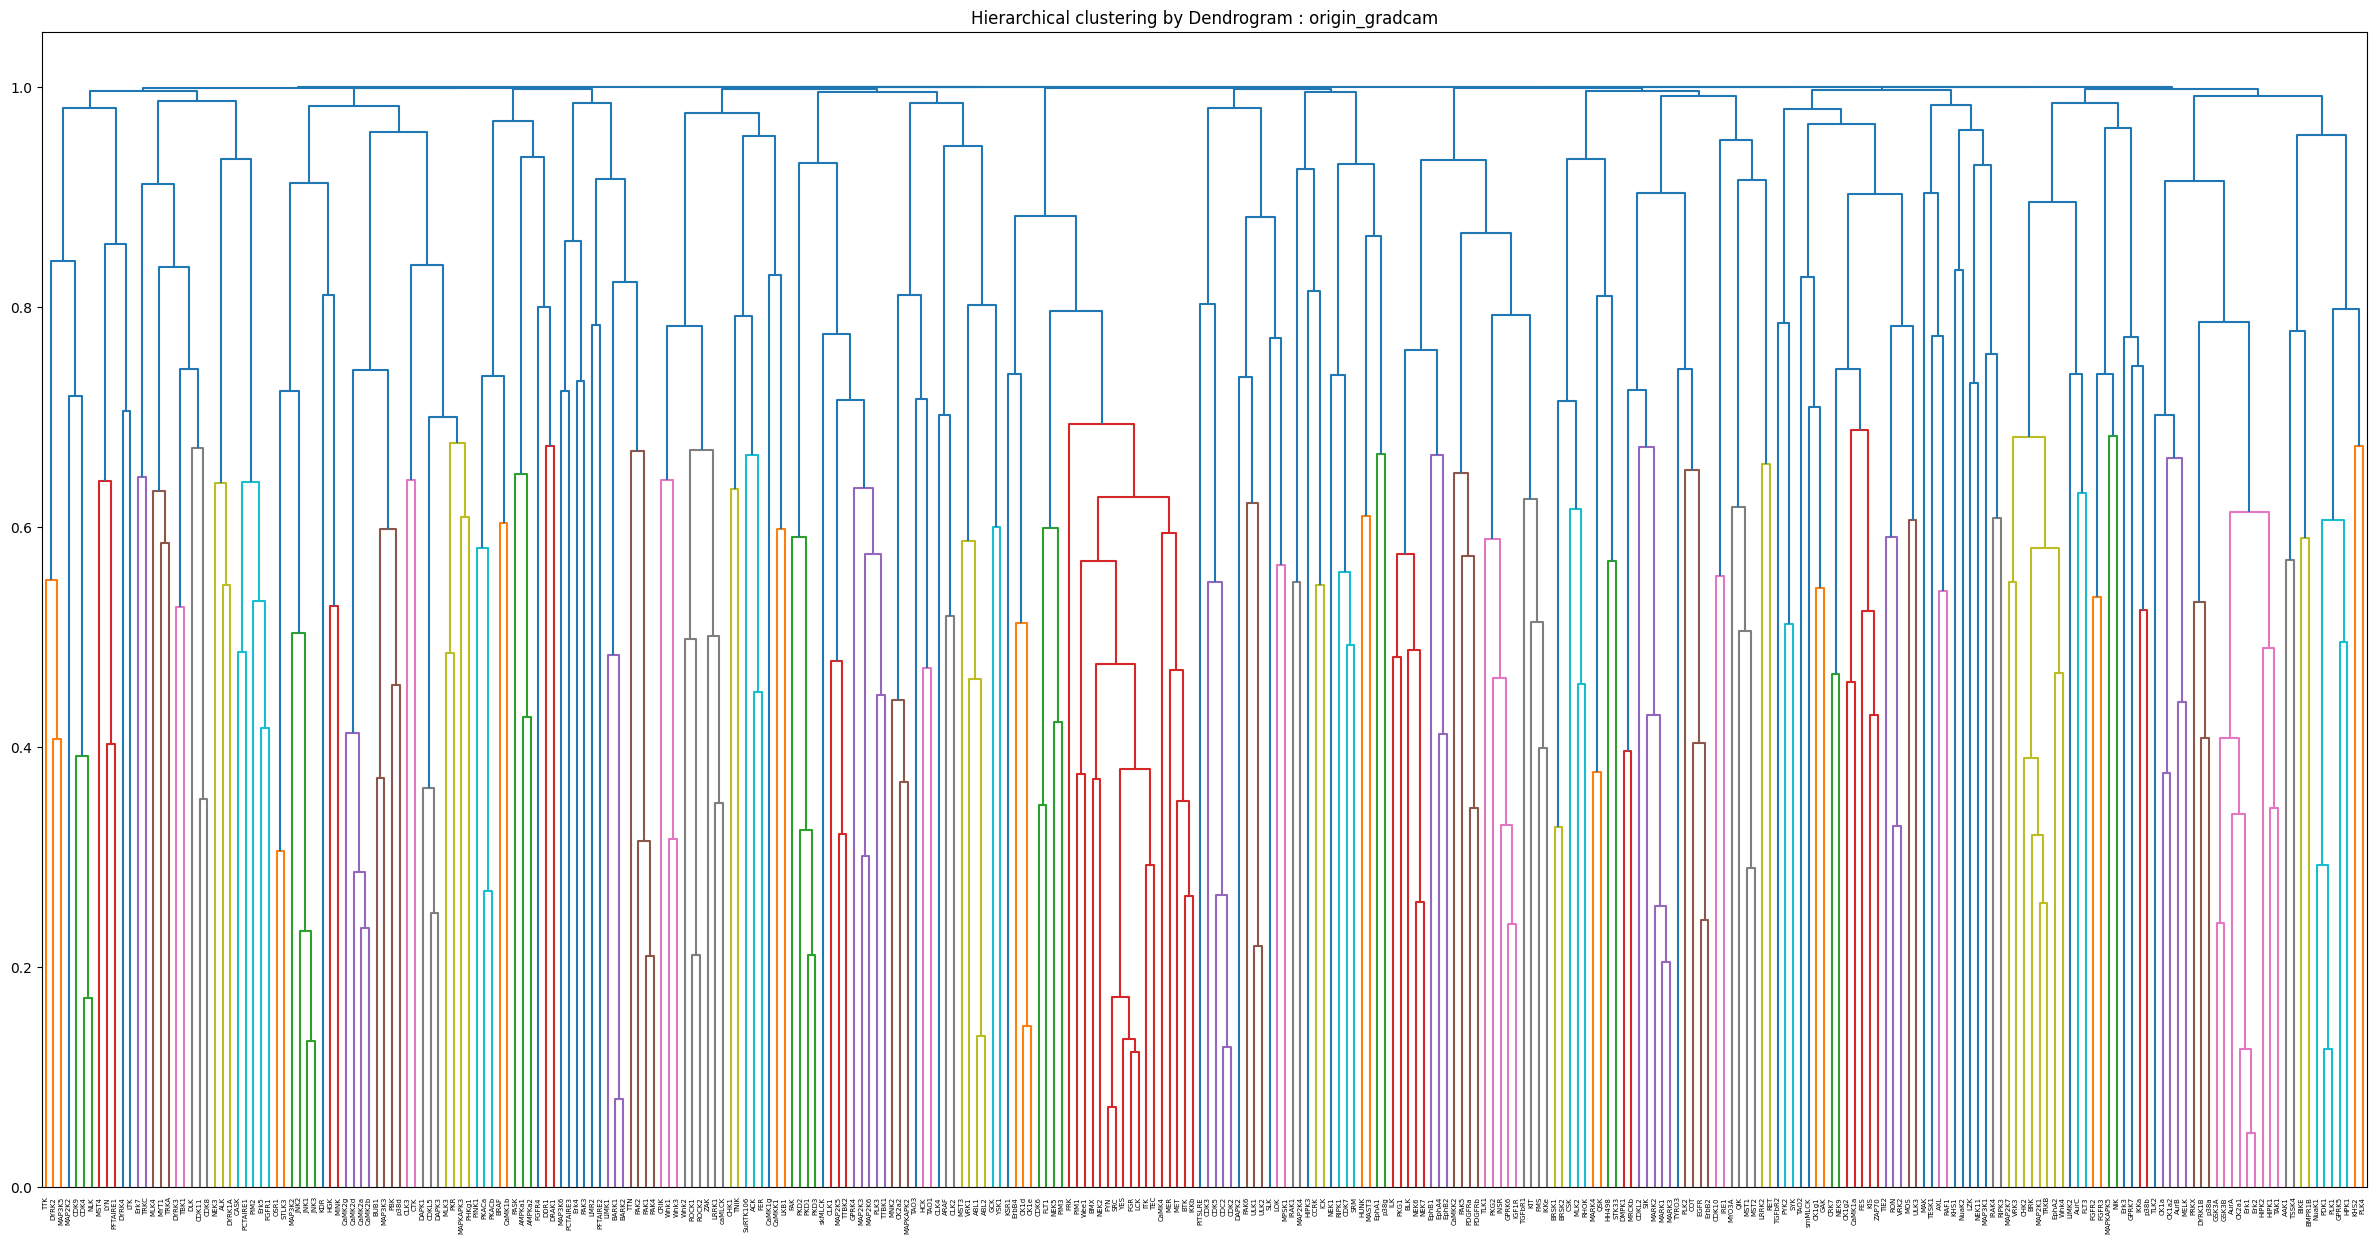

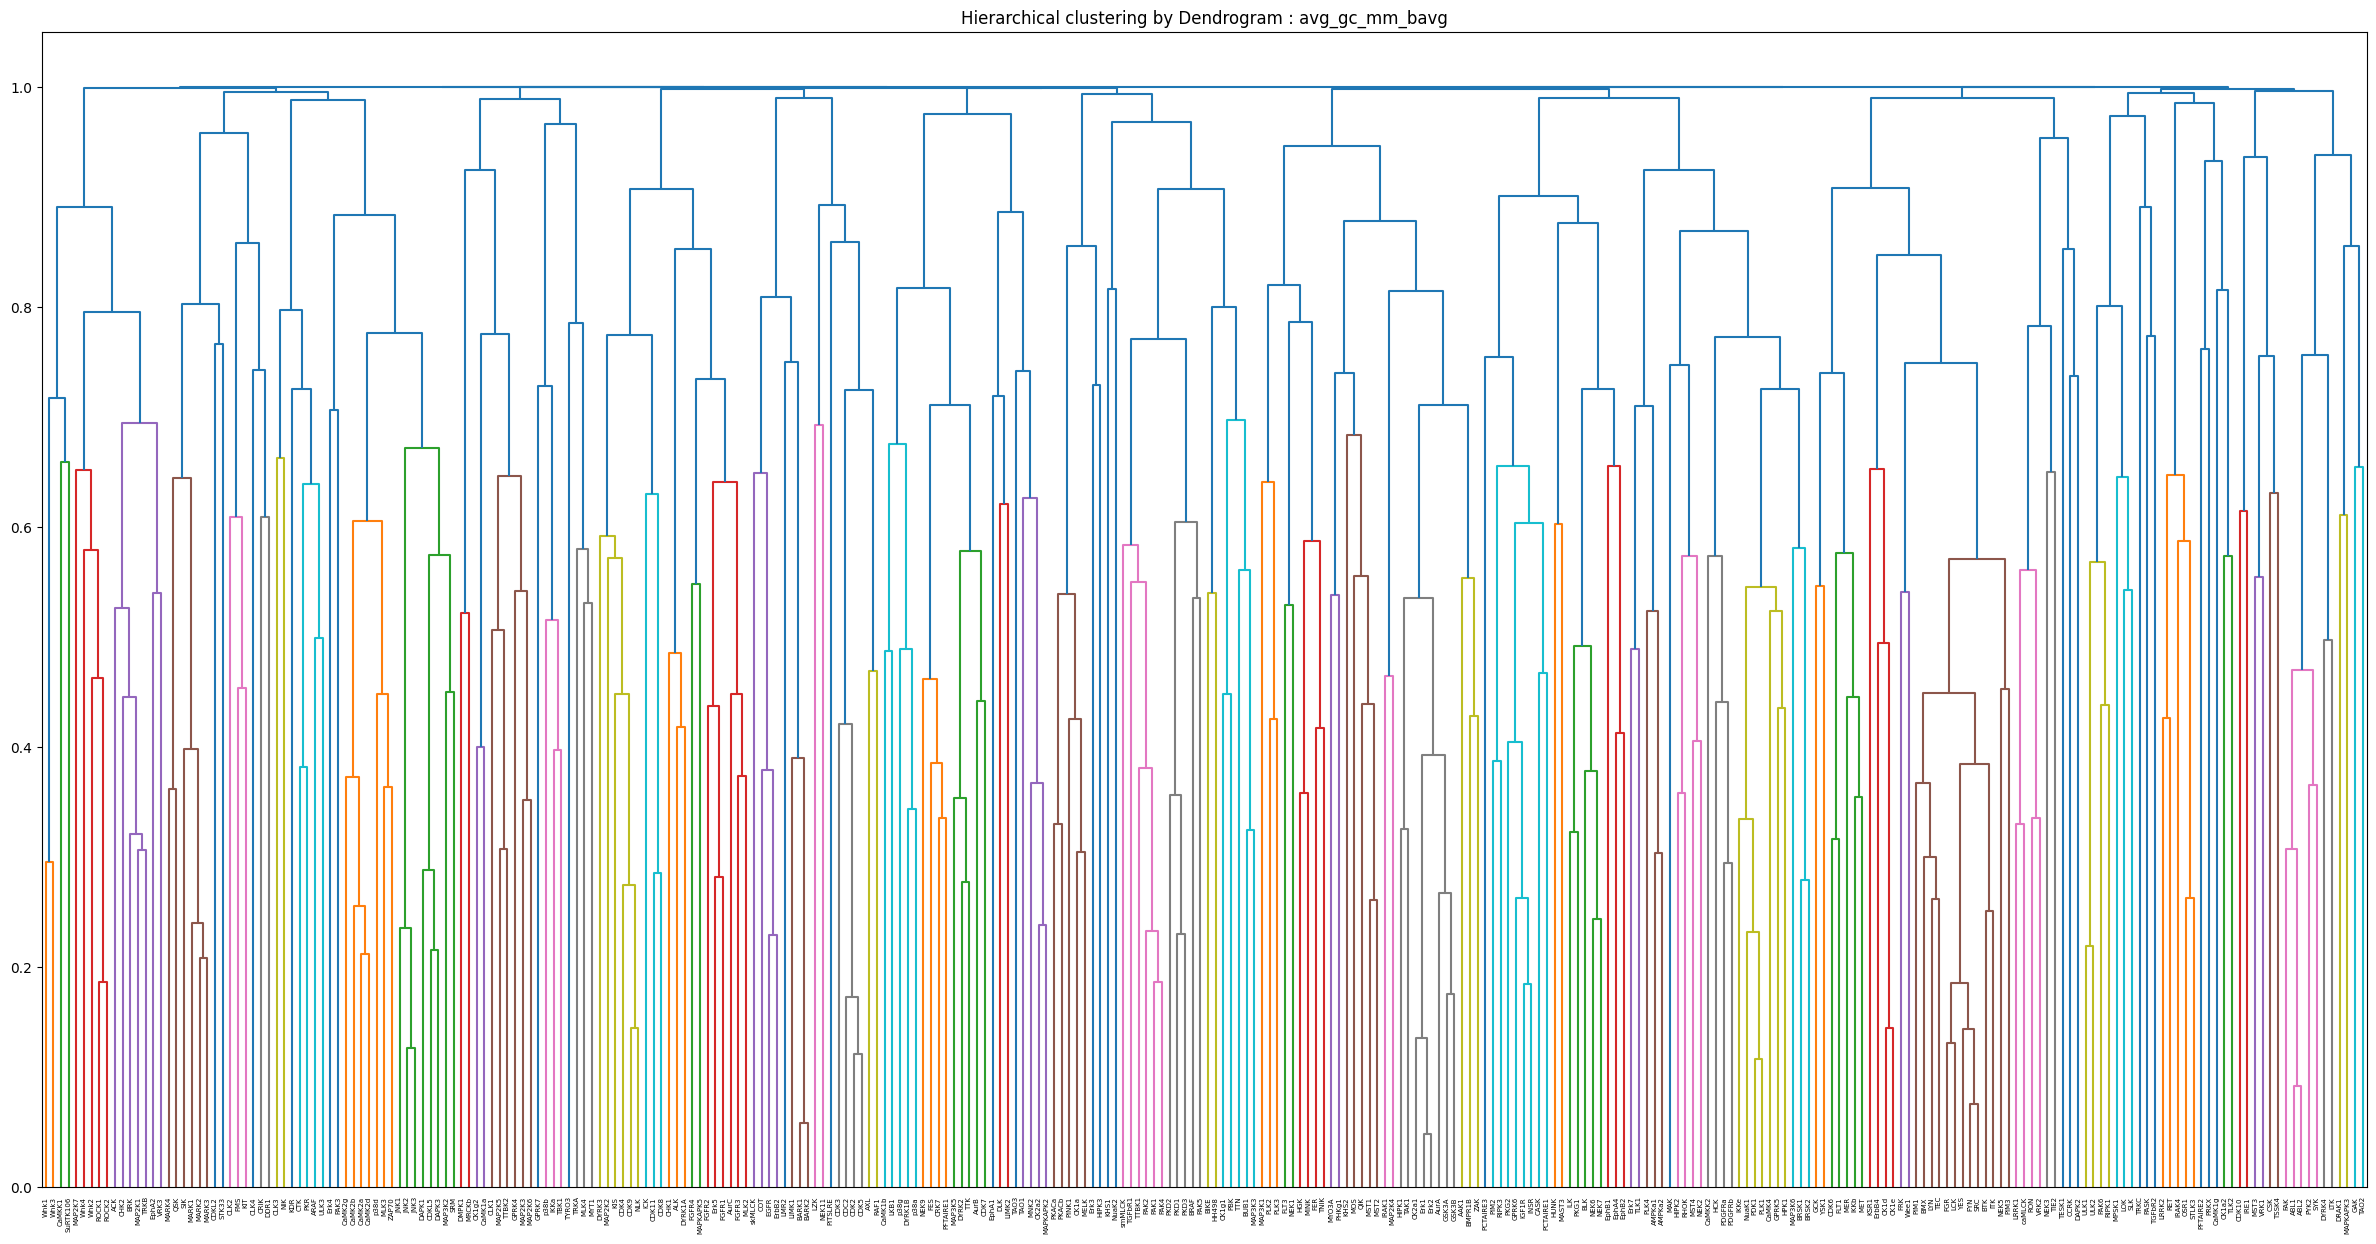

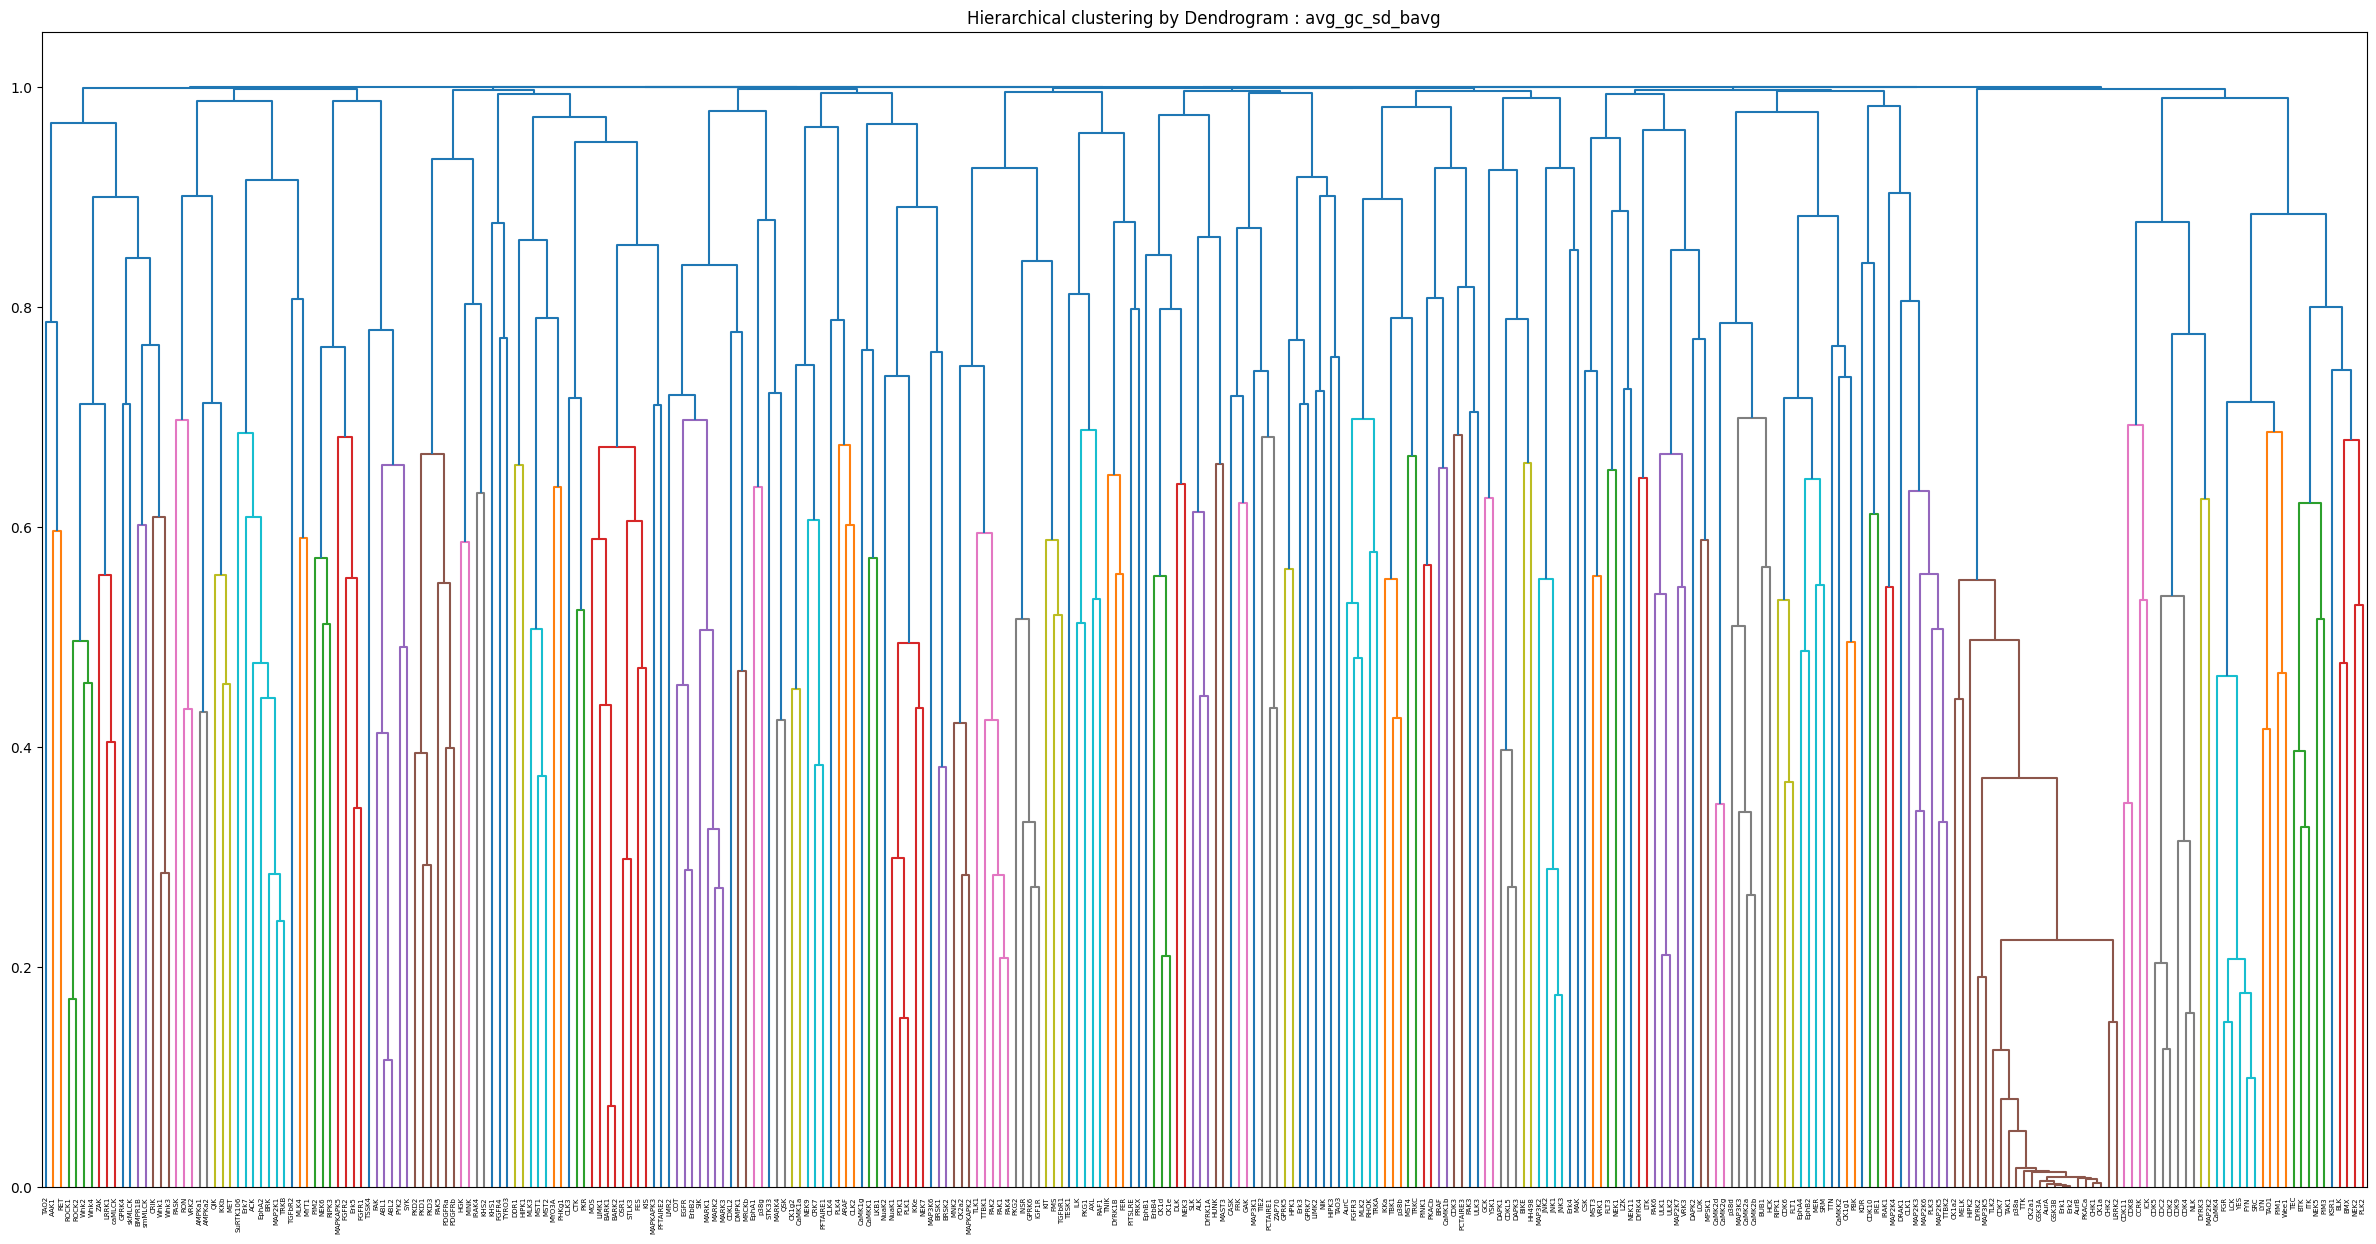

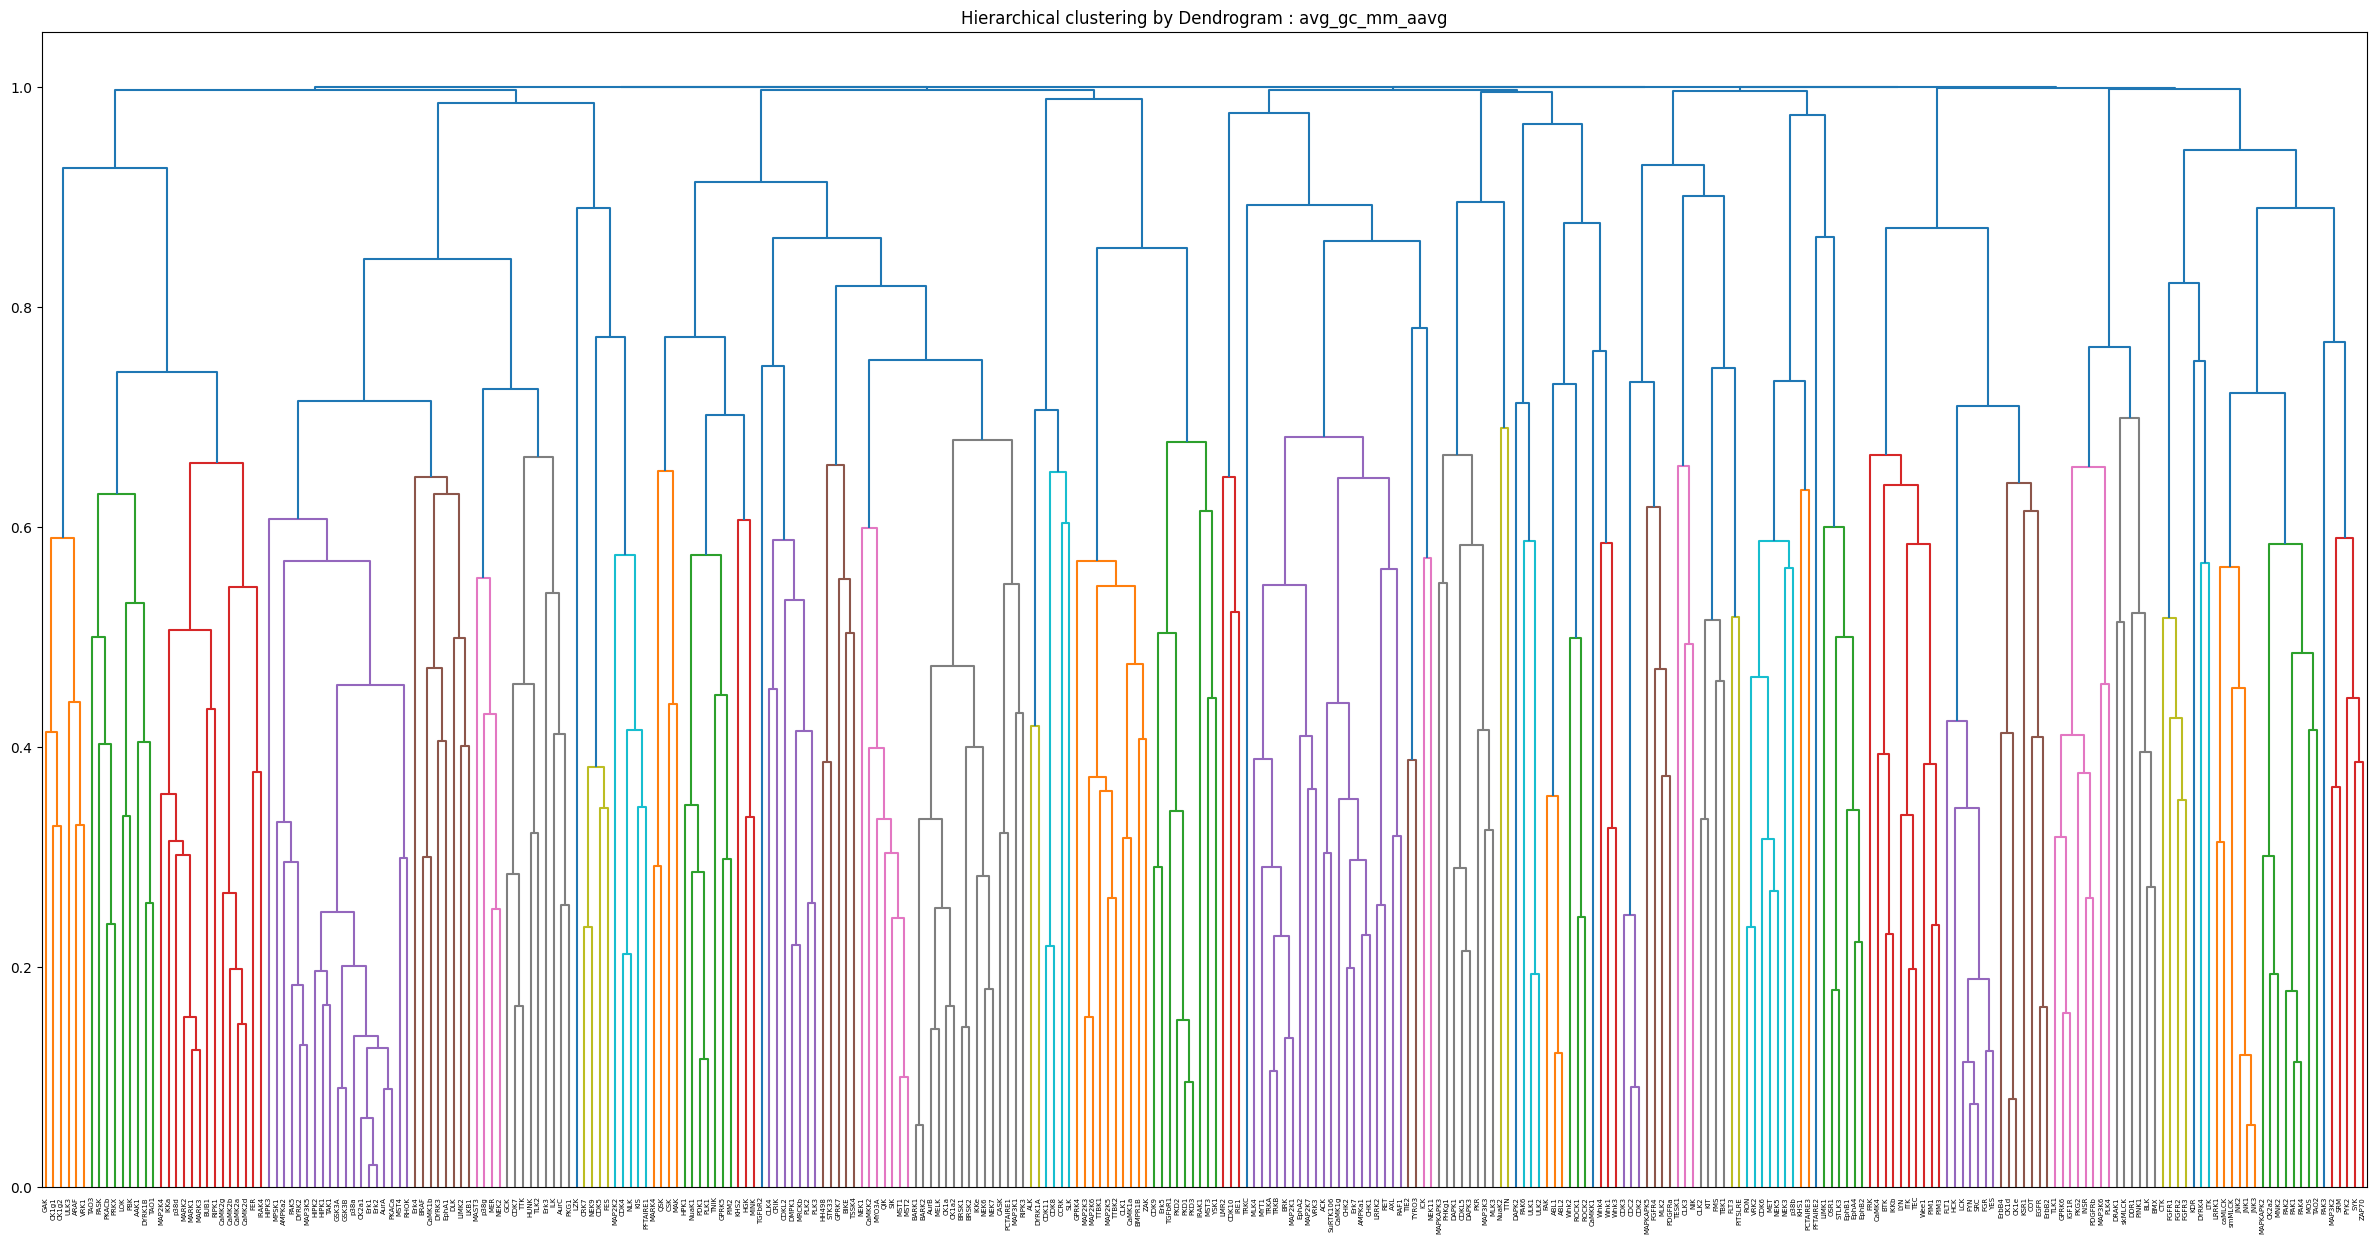

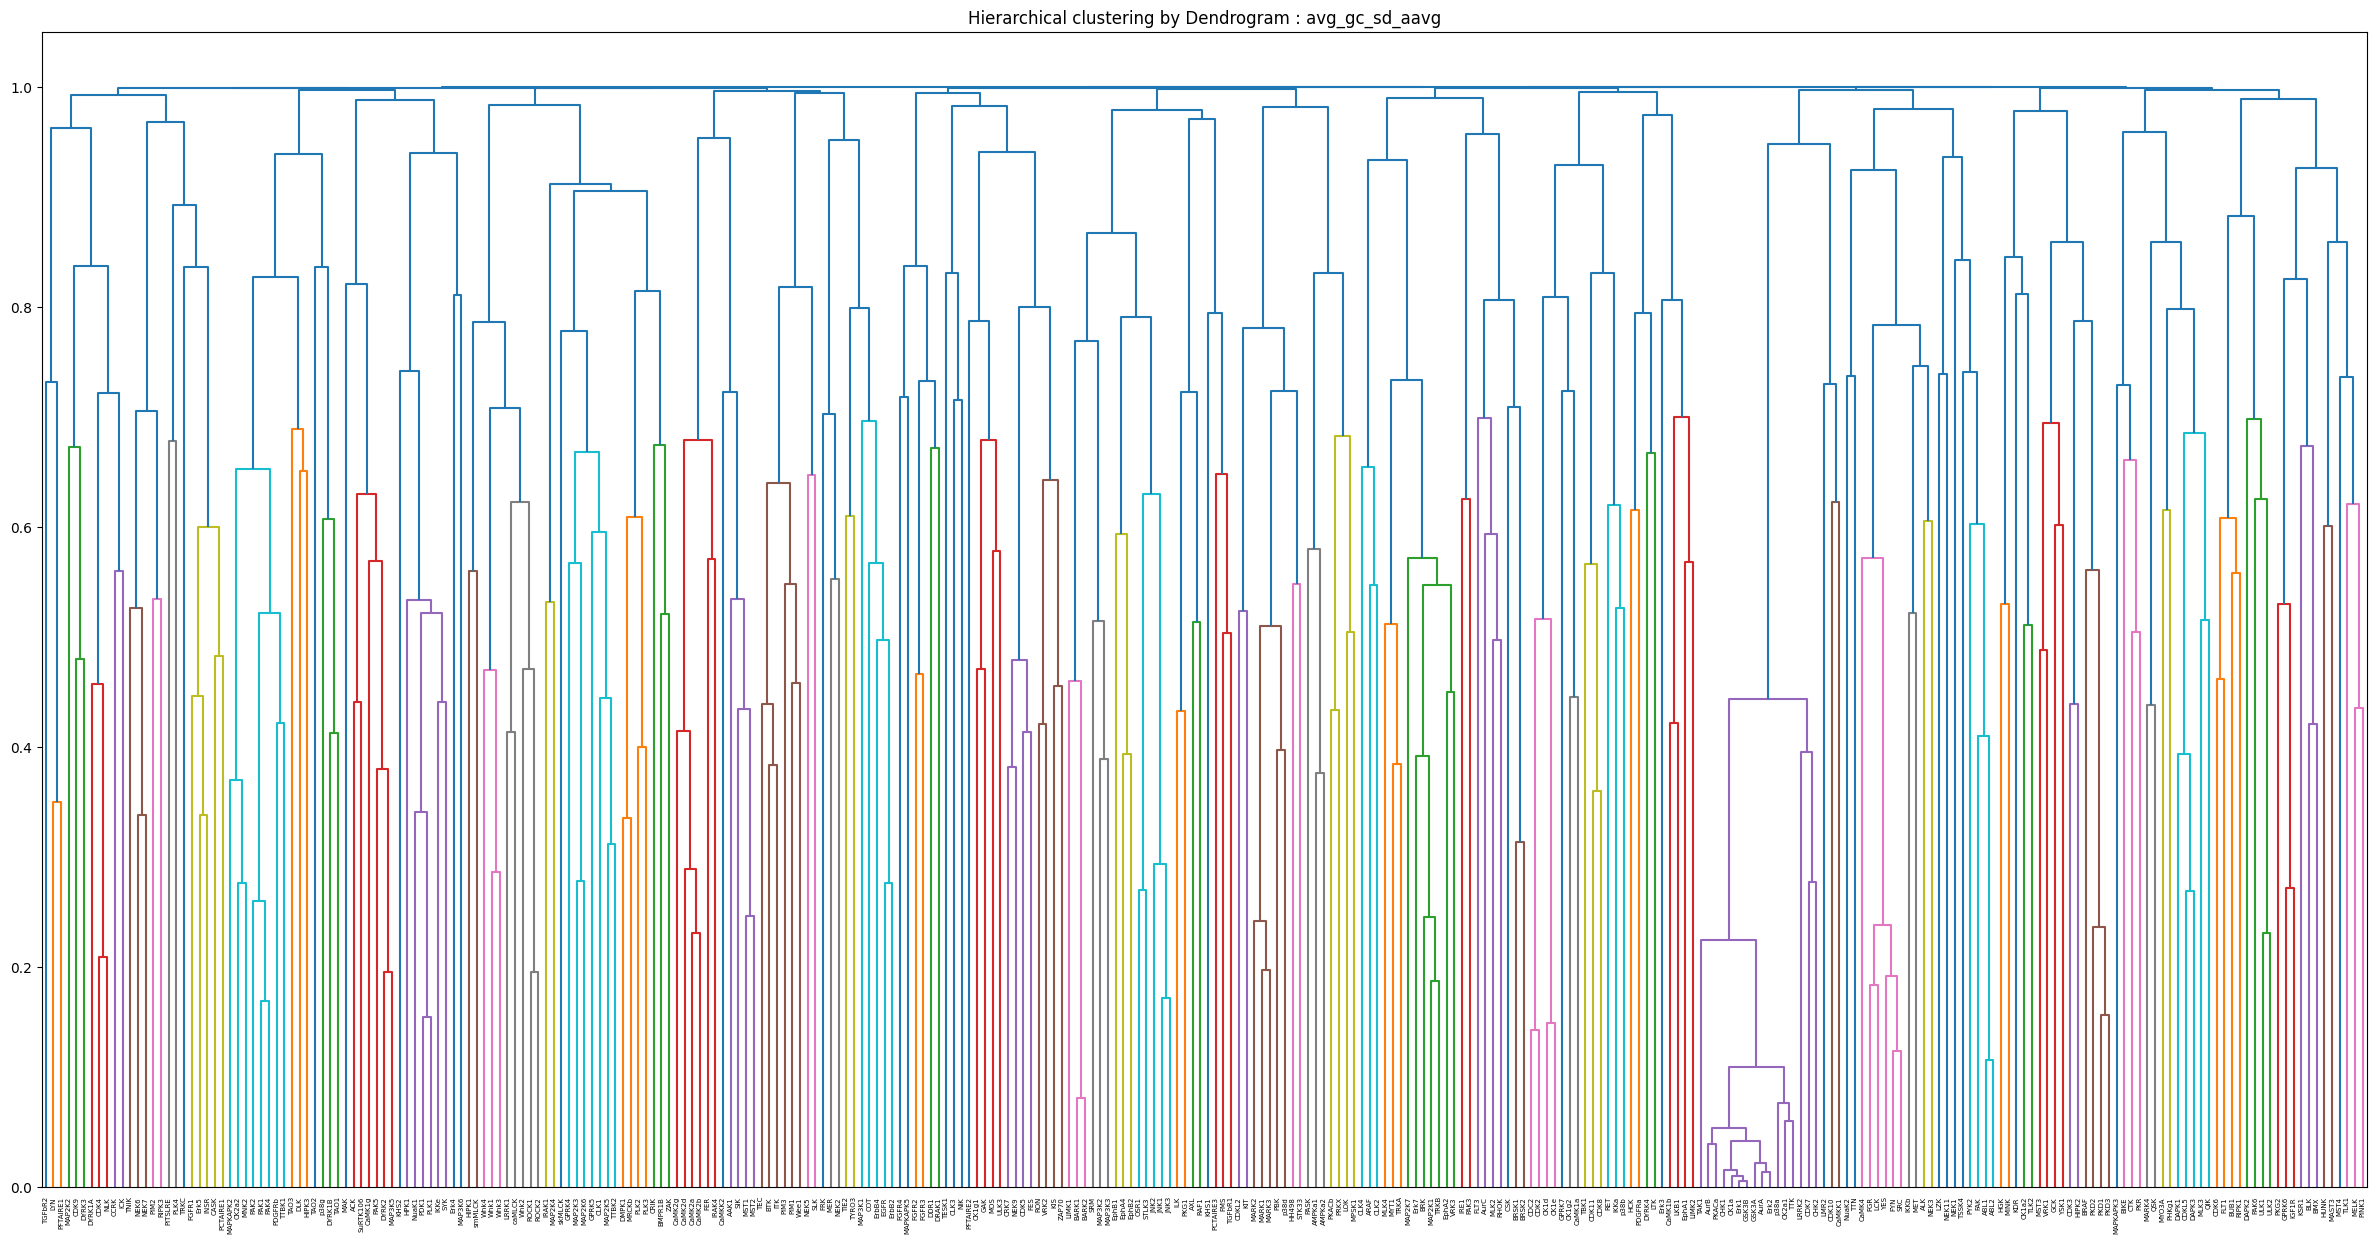

In [21]:
for _key, _value in zip(corr_matrix._fields, corr_matrix):

        # plt.figure(figsize=(20,7))
        # sns.heatmap(_value, annot=False, fmt=".2f", cmap="Blues")
        # plt.title(_key)
        # plt.savefig(f'output/heatmap_{_key}_before_avg.png')
        # plt.close()

        plt.figure(figsize=(30,15))
        dissimilarity = 1 - abs(_value)
        Z = linkage(squareform(dissimilarity), 'complete')

        dendrogram(Z, labels=_value.columns, orientation='top', 
                leaf_rotation=90);
        plt.title(f'Hierarchical clustering by Dendrogram : {_key}')
        plt.savefig(f'output/dendrogram_{_key}_before_avg.png')

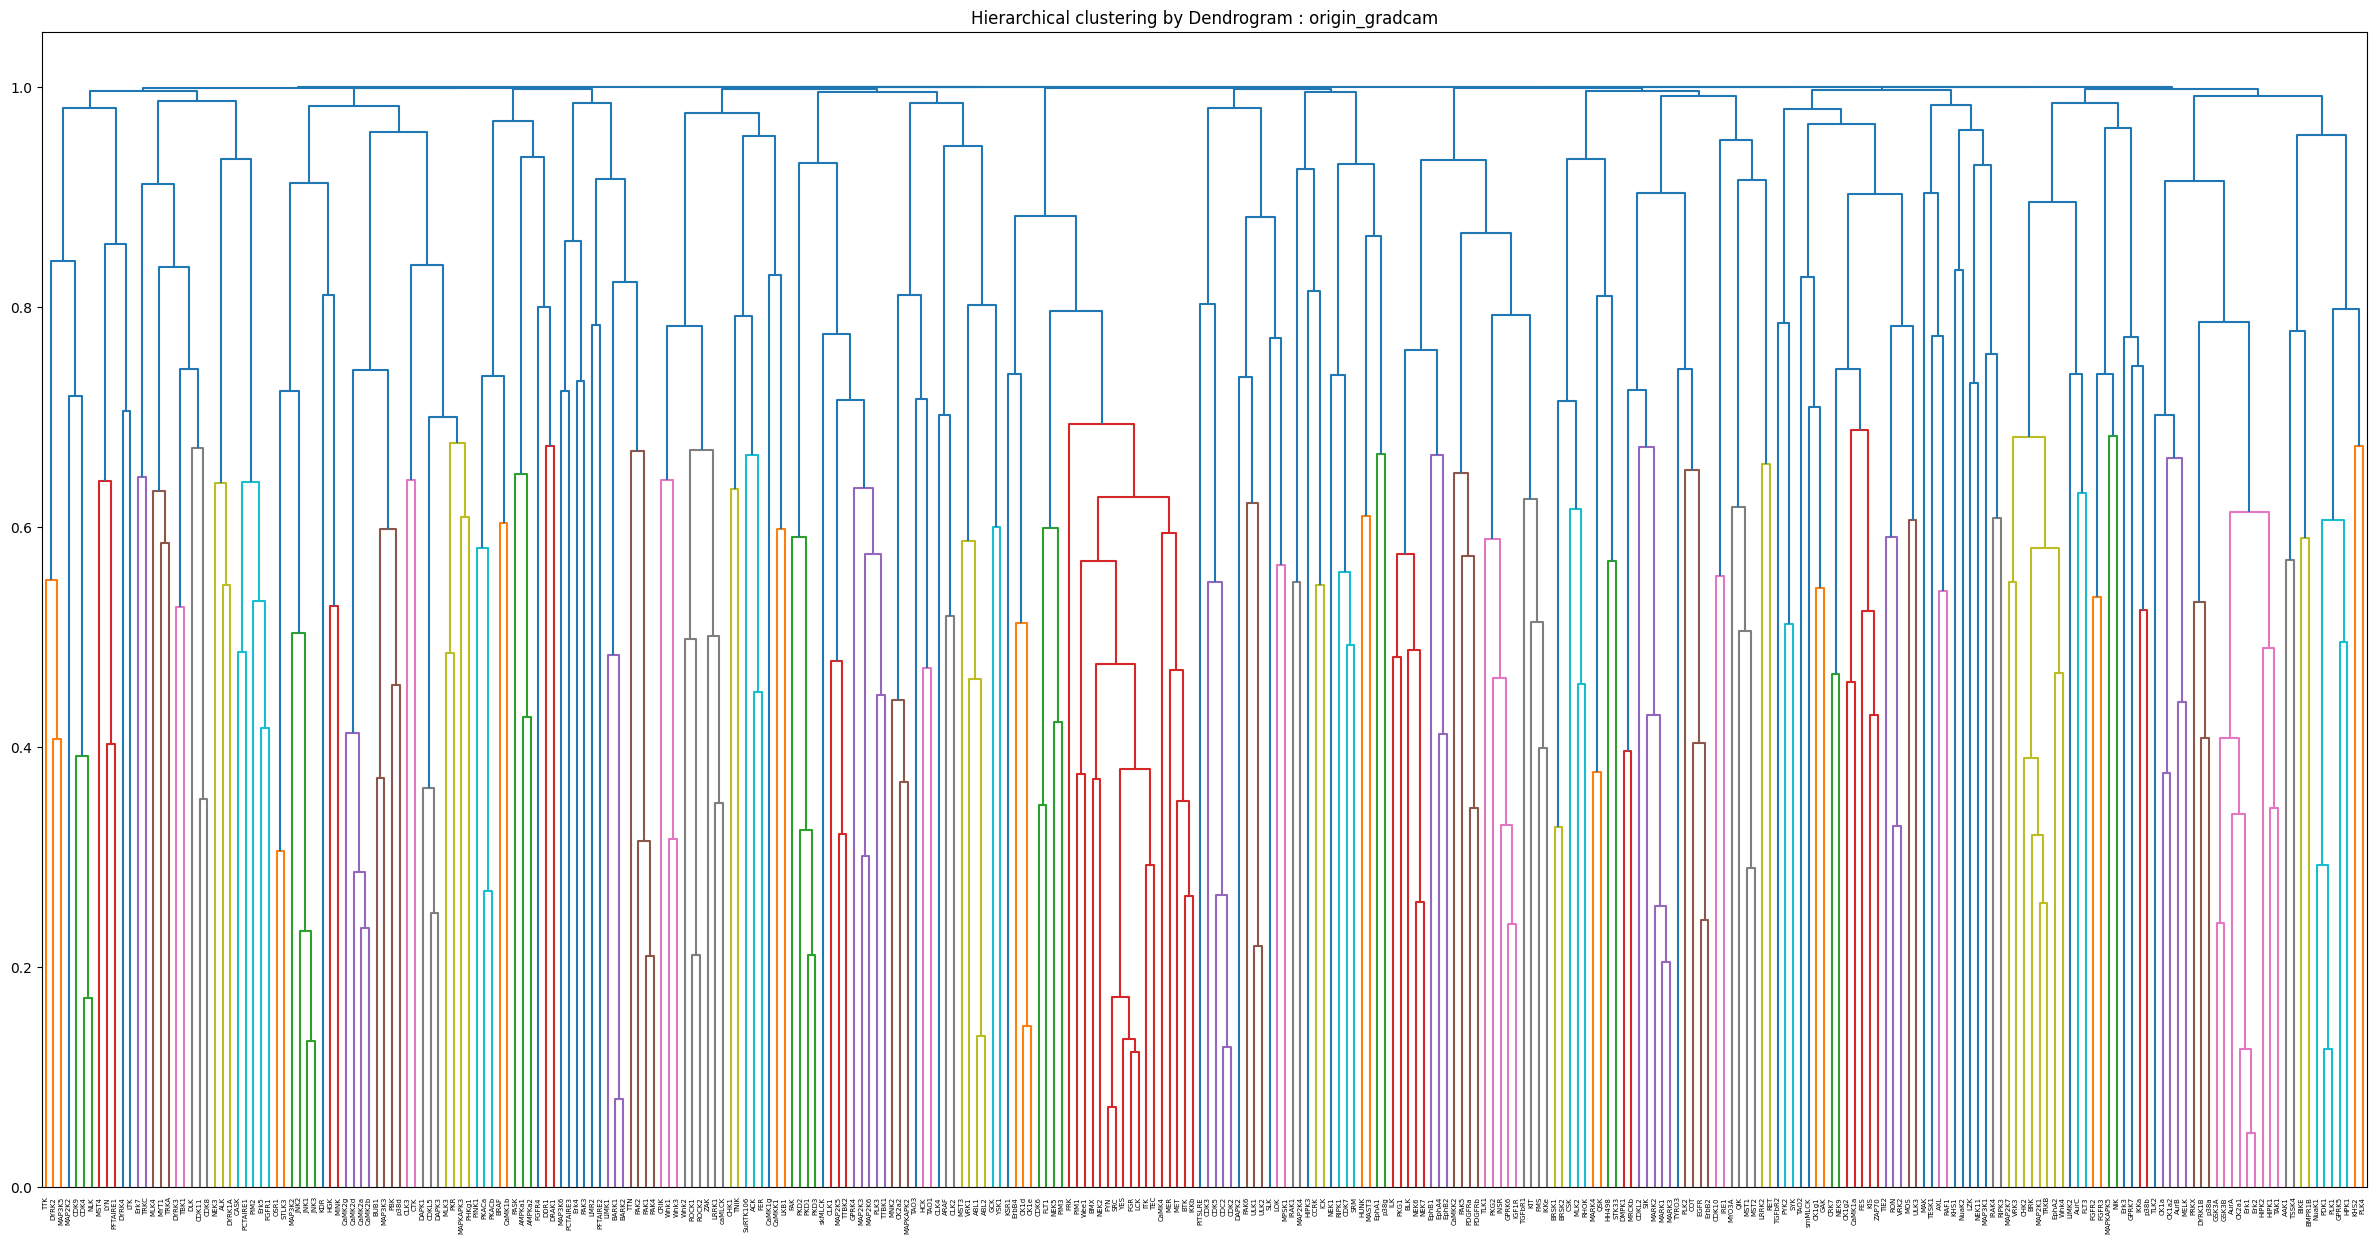

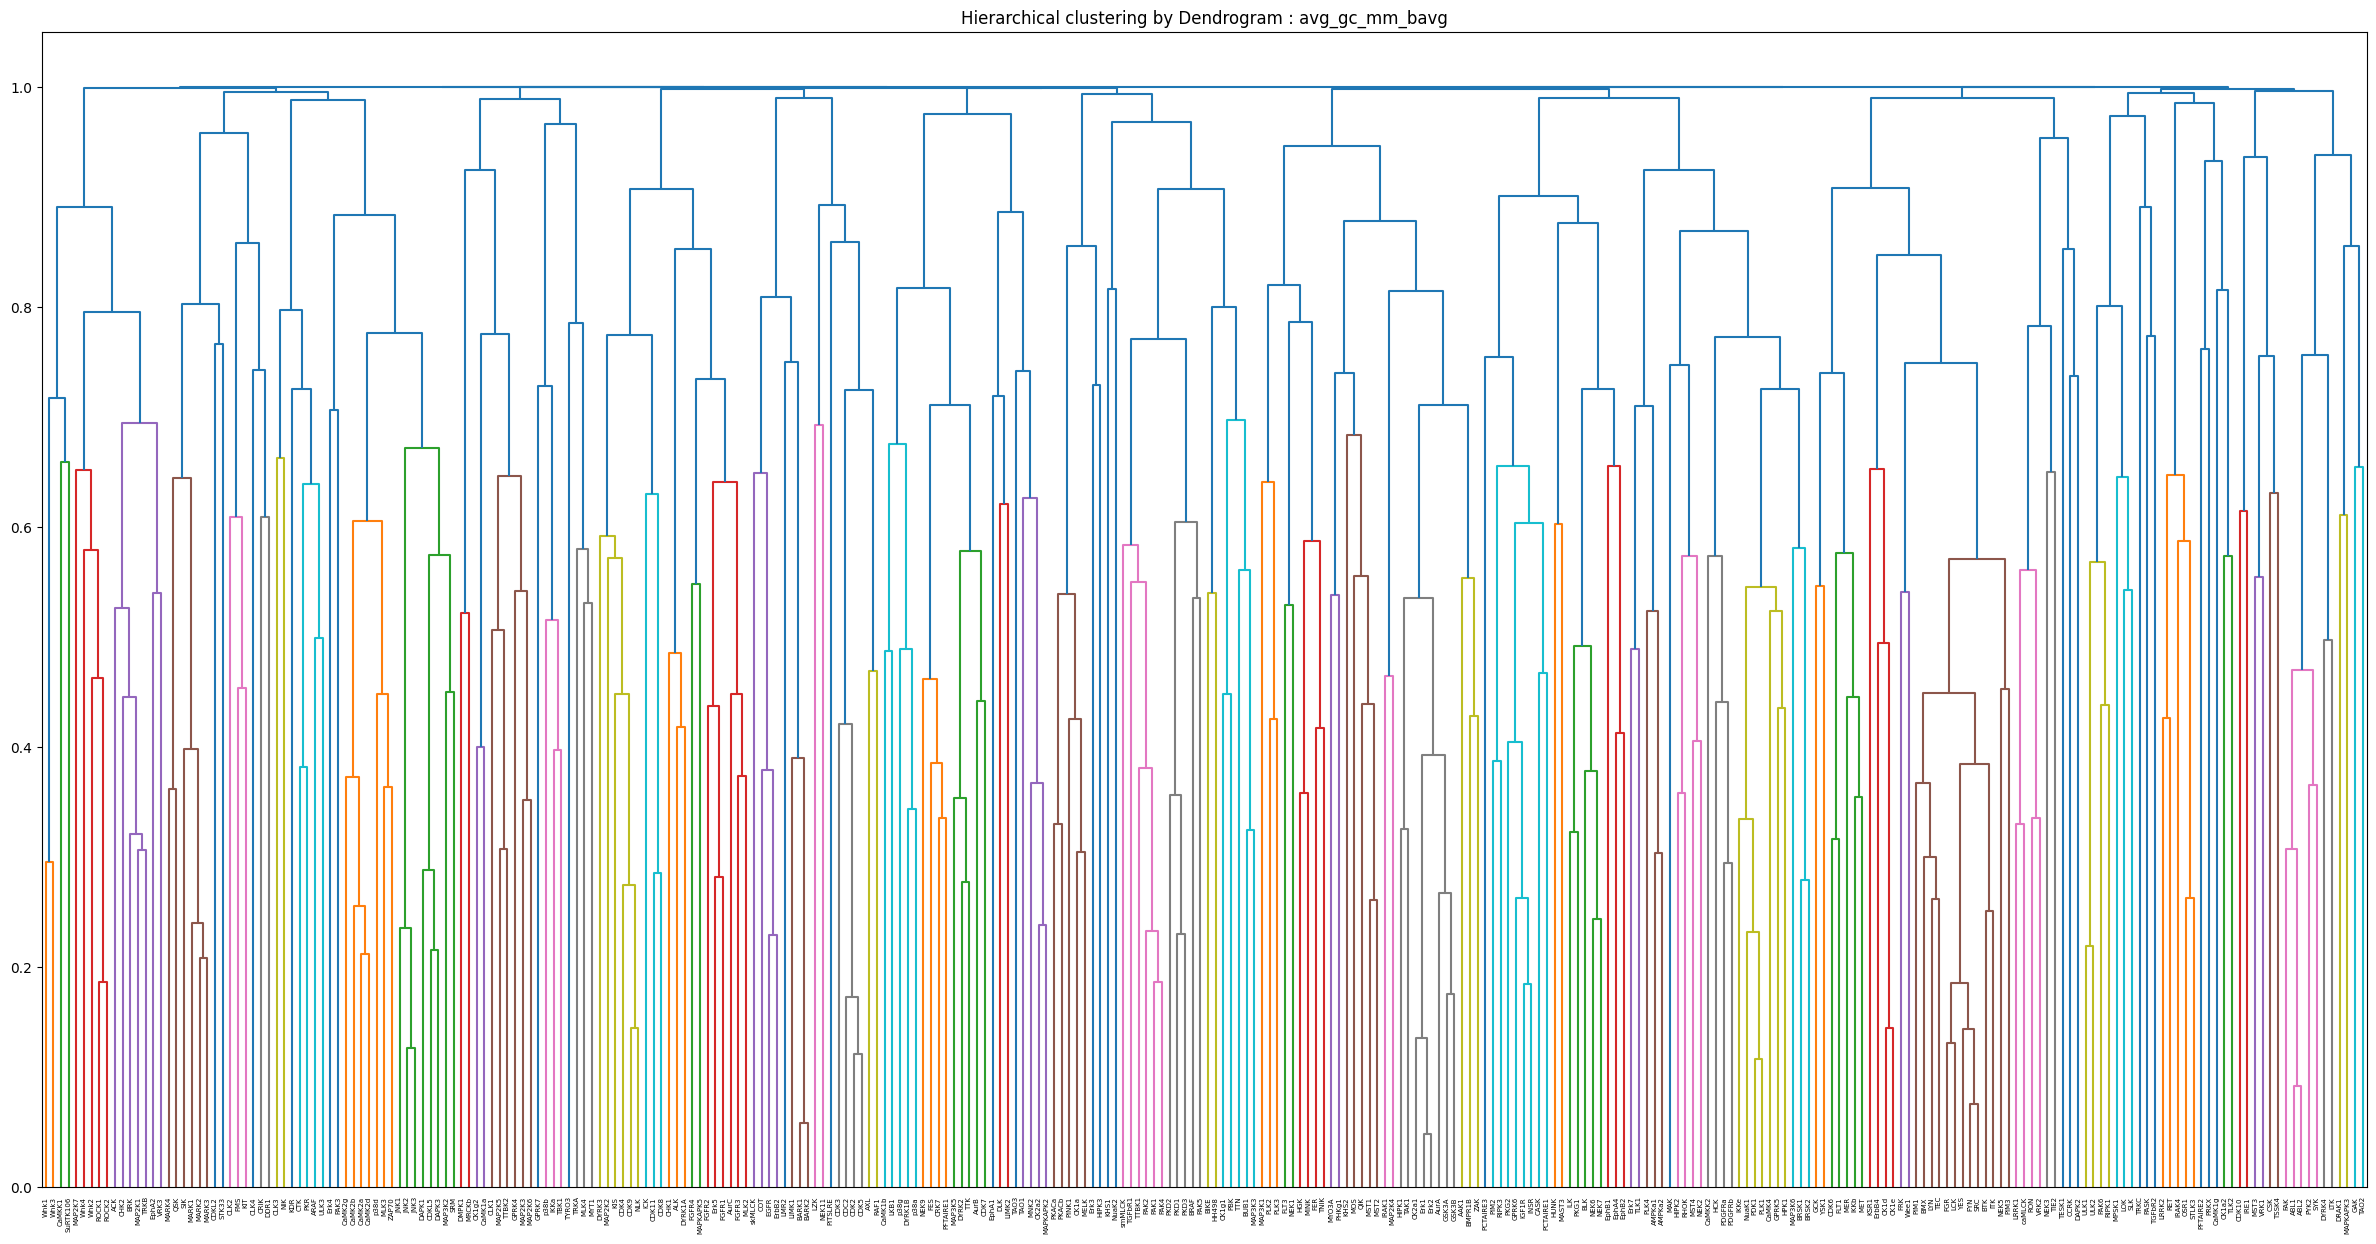

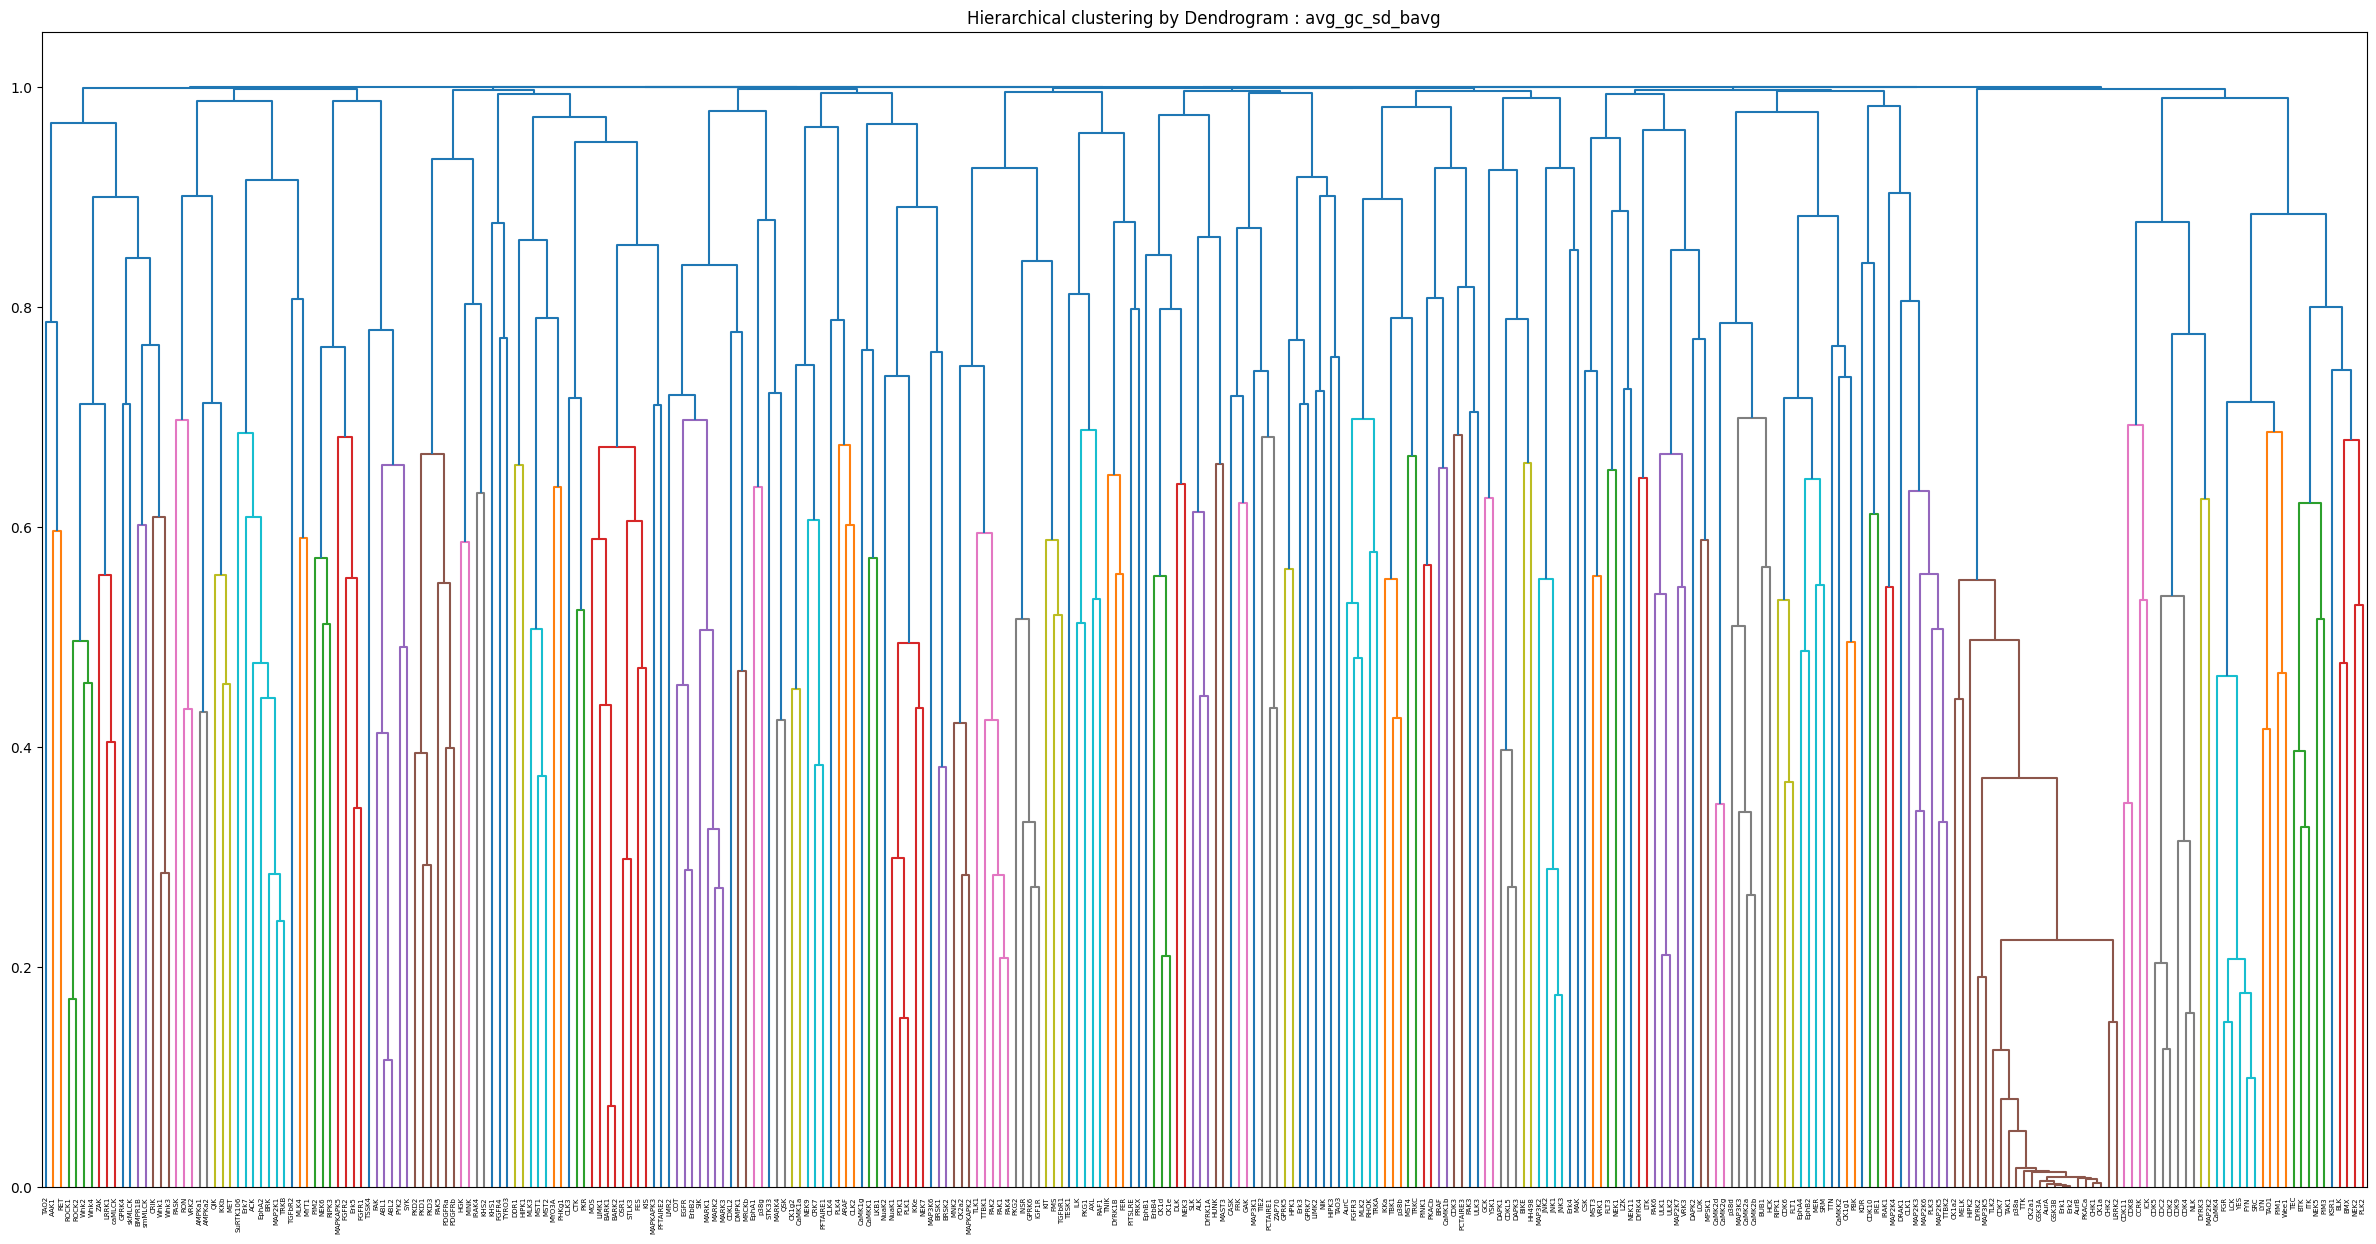

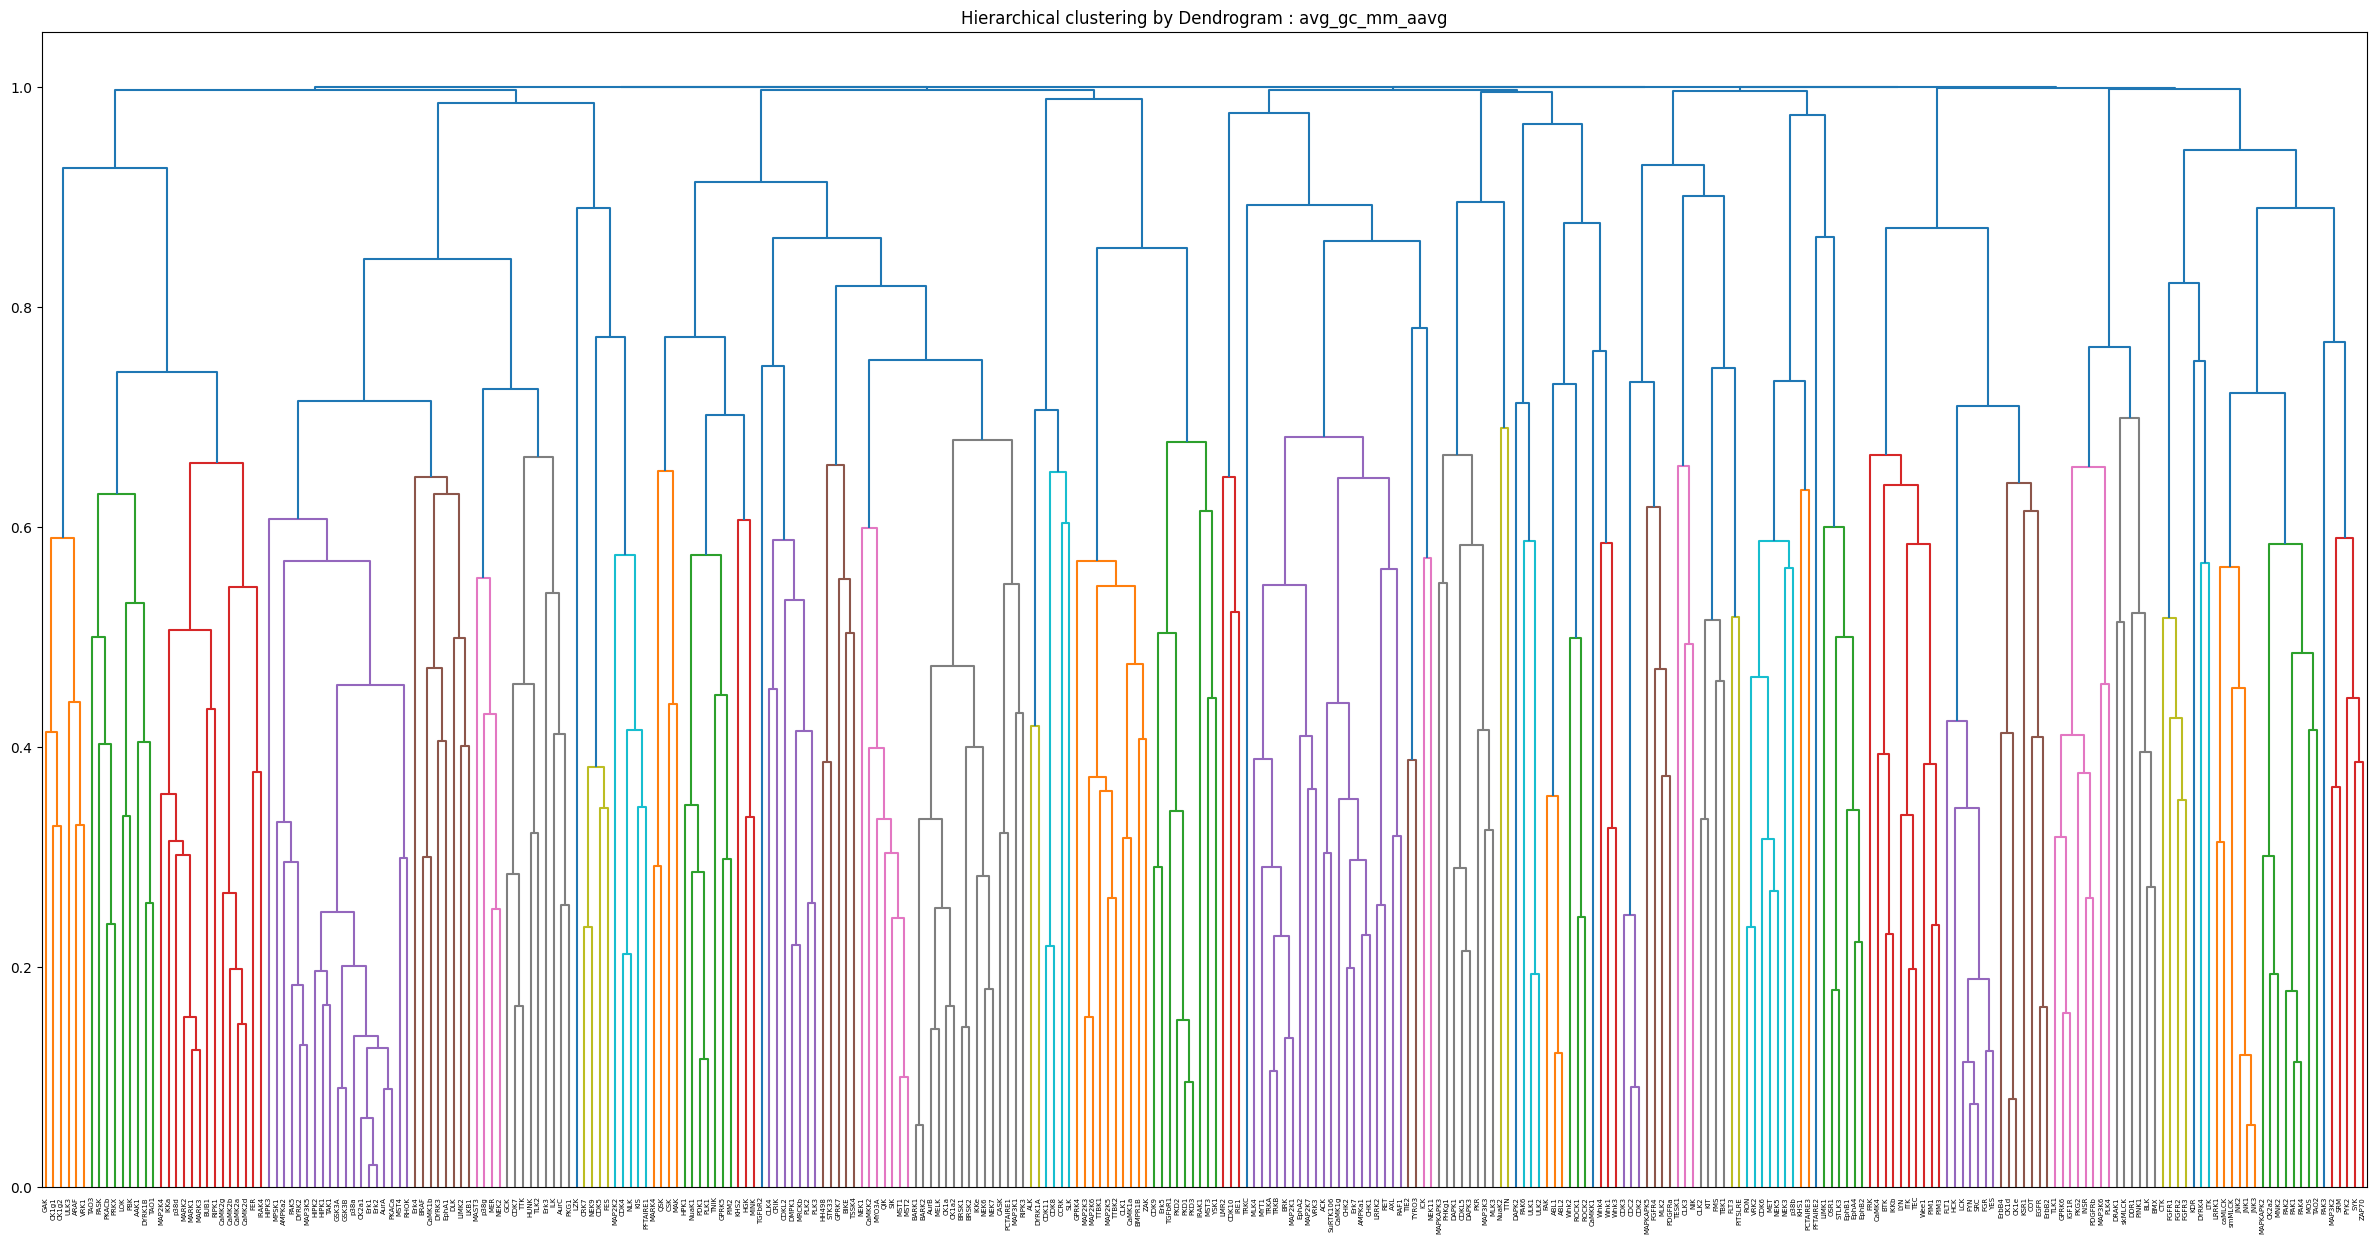

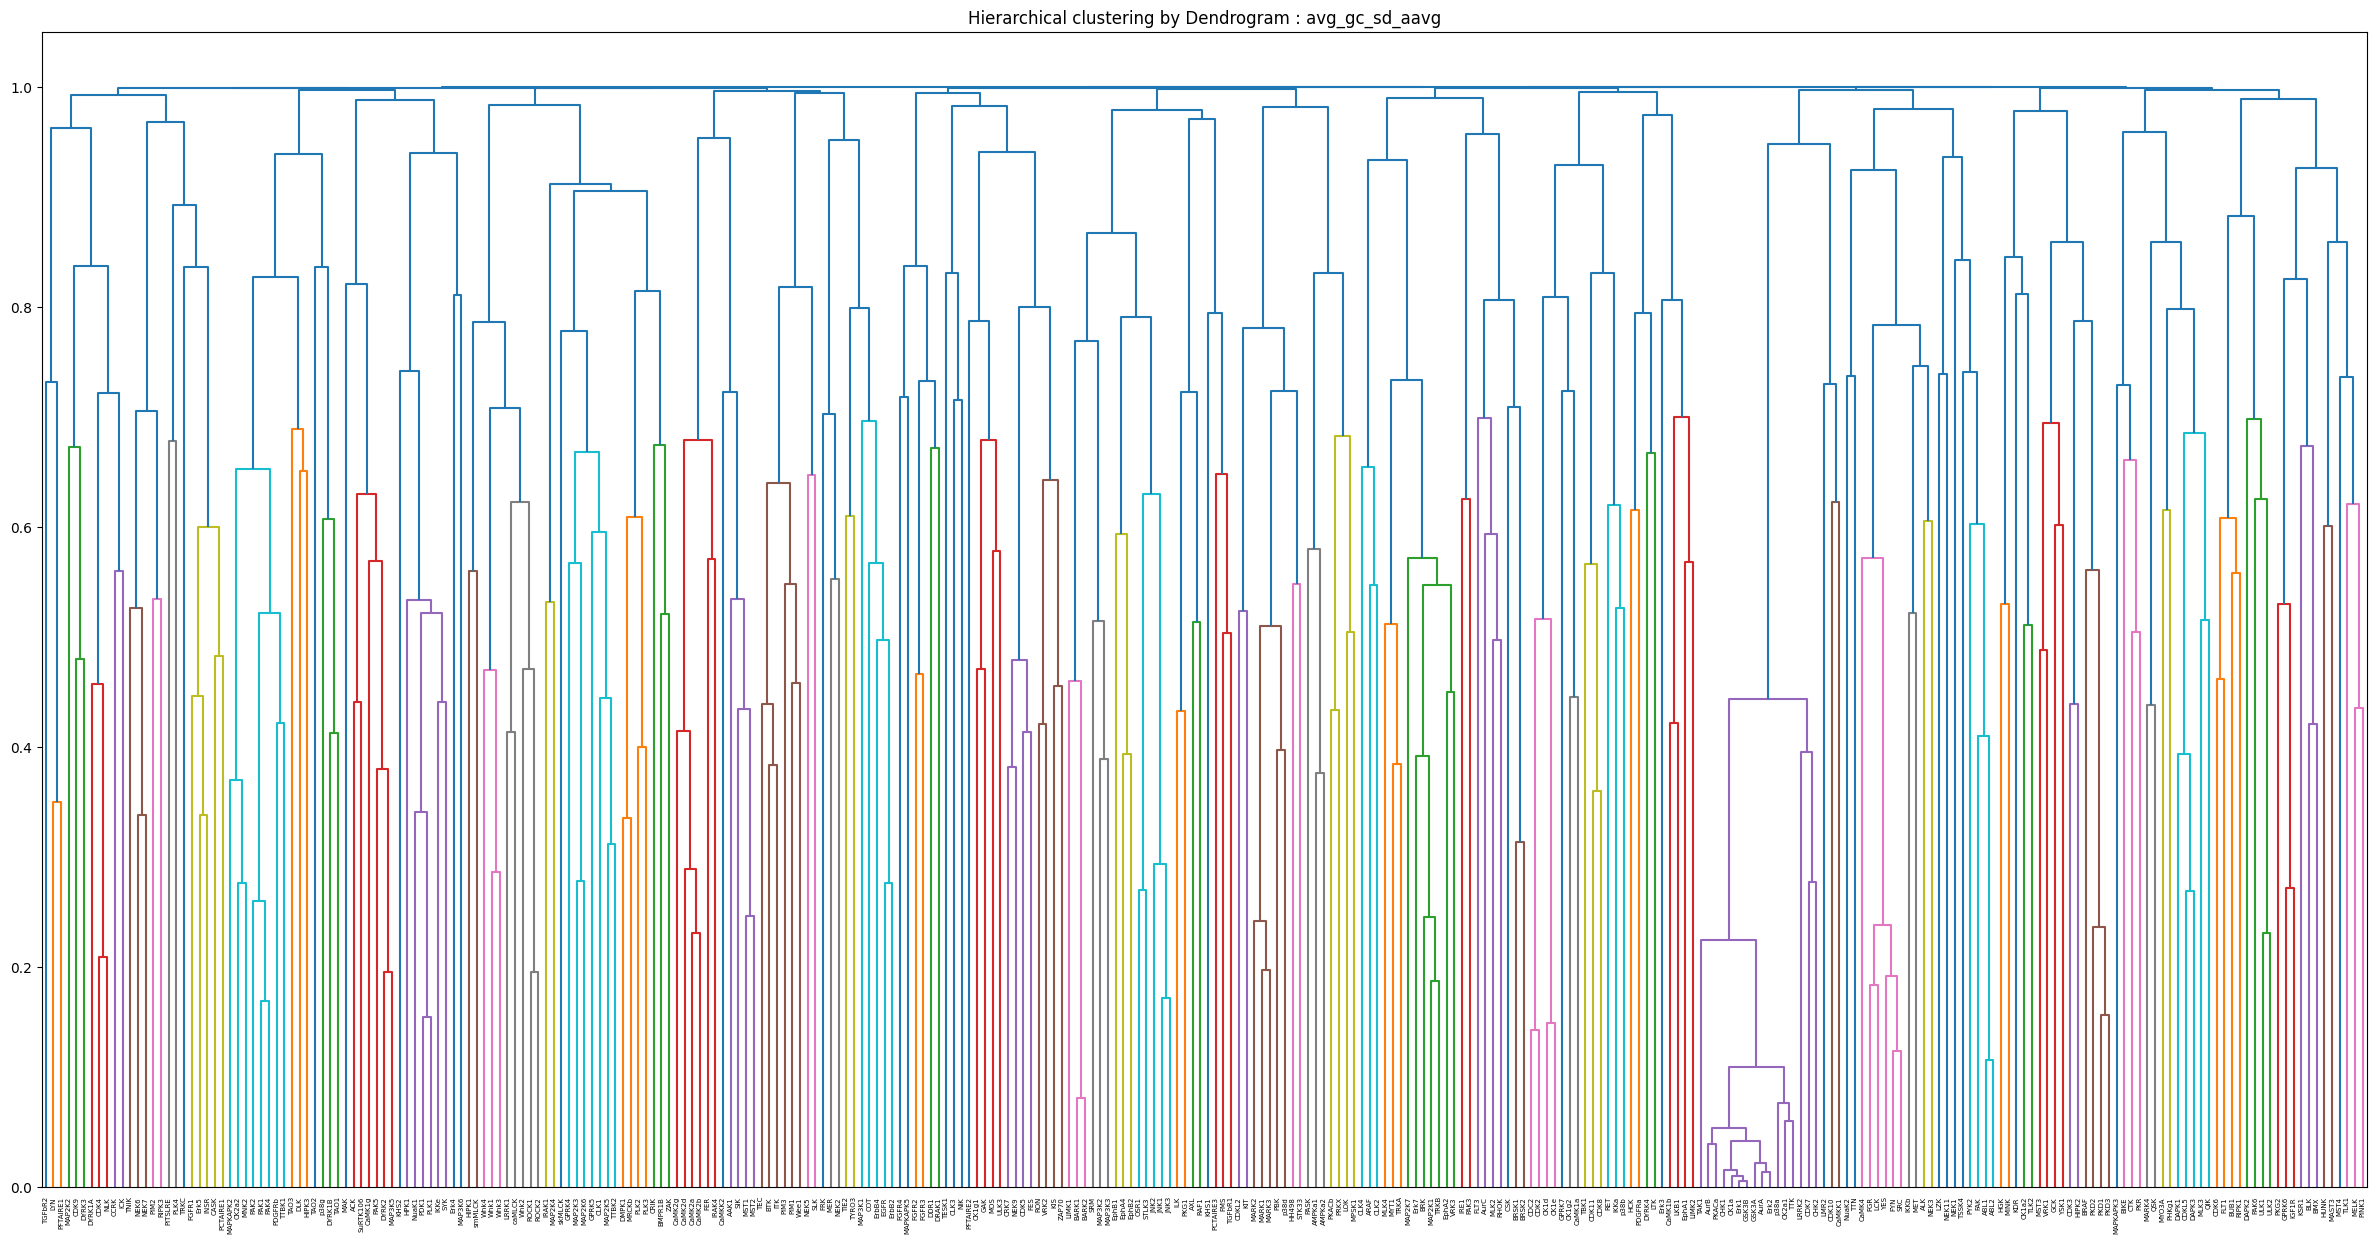

In [80]:
for _key, _value in zip(corr_matrix._fields, corr_matrix):

        # plt.figure(figsize=(20,7))
        # sns.heatmap(_value, annot=False, fmt=".2f", cmap="Blues")
        # plt.title(_key)
        # plt.savefig(f'output/heatmap_{_key}_before_avg.png')
        # plt.close()

        plt.figure(figsize=(30,15))
        dissimilarity = 1 - abs(_value)
        Z = linkage(squareform(dissimilarity), 'complete')

        dendrogram(Z, labels=_value.columns, orientation='top', 
                leaf_rotation=90);
        plt.title(f'Hierarchical clustering by Dendrogram : {_key}')
        plt.savefig(f'output/dendrogram_{_key}_before_avg.png')
        # plt.close()


        # clustermap = sns.clustermap(_value, method="complete", cmap='RdYlBu_r', annot=False, 
        #                         annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(60, 40))

        # # x축과 y축의 tick label에 모든 인덱스 값을 표시하지 않고 특정 간격으로 표시
        # x_indices = np.arange(0.5, len(_value.index), 1)  # 인덱스를 2의 간격으로 선택
        # y_indices = np.arange(0.5, len(_value.columns), 1)

        # clustermap.ax_heatmap.set_xticks(x_indices)
        # clustermap.ax_heatmap.set_yticks(y_indices)

        # # x축과 y축의 tick label을 선택한 인덱스 값으로 설정
        # clustermap.ax_heatmap.set_xticklabels(_value.index, rotation=90)
        # clustermap.ax_heatmap.set_yticklabels(_value.columns)

        # plt.title(f'Correlation clustermap: {_key}', loc='center')
        # plt.savefig(f'output/clustermap_{_key}_before_avg.png')
        # plt.close()
        


In [68]:
clustermap = sns.clustermap(_value, method="complete", cmap='RdYlBu_r', annot=False, 
                        annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(60, 40))

# x축과 y축의 tick label에 모든 인덱스 값을 표시하지 않고 특정 간격으로 표시
x_indices = np.arange(0.5, len(_value.index), 1)  # 인덱스를 2의 간격으로 선택
y_indices = np.arange(0.5, len(_value.columns), 1)

clustermap.ax_heatmap.set_xticks(x_indices)
clustermap.ax_heatmap.set_yticks(y_indices)

# x축과 y축의 tick label을 선택한 인덱스 값으로 설정
clustermap.ax_heatmap.set_xticklabels(_value.index, rotation=90)
clustermap.ax_heatmap.set_yticklabels(_value.columns)

plt.title(f'Correlation clustermap: {_key}', loc='center')
plt.savefig(f'output/clustermap_{_key}_before_avg.png')
plt.close()

/home/hb/anaconda3/envs/pp/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [76]:
import seaborn as sns

# 이 부분은 원래 클러스터맵 코드에 적용하시면 됩니다.
# clustermap = sns.clustermap(...)

# 같은 클러스터에 속하는 것들을 확인하기 위한 코드
row_order = clustermap.dendrogram_row.reordered_ind
col_order = clustermap.dendrogram_col.reordered_ind

# 인덱스를 사용하여 원본 데이터의 인덱스 값을 얻습니다.
ordered_data = _value.iloc[row_order, col_order]

print("Row Order:", row_order)
print("Column Order:", col_order)
print("Ordered Data:\n", ordered_data)


Row Order: [124, 129, 127, 197, 198, 111, 213, 67, 104, 214, 138, 139, 166, 241, 219, 222, 246, 24, 270, 202, 217, 234, 110, 121, 68, 51, 178, 220, 284, 7, 50, 267, 279, 53, 86, 87, 177, 22, 80, 105, 142, 196, 33, 102, 115, 215, 216, 43, 44, 83, 84, 85, 65, 176, 195, 249, 152, 286, 221, 223, 232, 15, 17, 133, 263, 106, 252, 143, 101, 291, 297, 49, 130, 280, 281, 131, 210, 245, 253, 278, 34, 269, 40, 150, 47, 296, 39, 41, 88, 114, 10, 277, 226, 89, 9, 113, 258, 251, 265, 209, 77, 165, 31, 201, 4, 75, 243, 156, 25, 123, 204, 255, 140, 55, 199, 218, 32, 96, 30, 26, 29, 264, 27, 132, 154, 153, 266, 193, 69, 203, 271, 273, 237, 5, 60, 262, 1, 2, 288, 247, 248, 290, 287, 289, 242, 257, 147, 8, 66, 93, 155, 272, 161, 285, 19, 82, 3, 181, 191, 163, 38, 70, 180, 164, 61, 62, 117, 173, 186, 187, 190, 240, 46, 58, 149, 183, 125, 250, 37, 141, 112, 254, 274, 298, 171, 170, 172, 158, 159, 276, 293, 295, 16, 109, 52, 14, 54, 36, 28, 35, 92, 72, 78, 283, 108, 188, 292, 119, 227, 11, 91, 90, 145, 259,

In [72]:
row_colors = clustermap.row_colors
col_colors = clustermap.col_colors
row_colors


In [292]:
# import scipy
# g = sns.clustermap(_value, method='average')
# den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage,
#                                          labels = _value.index,
#                                          color_threshold=0.60)  
# from collections import defaultdict

# def get_cluster_classes(den, label='ivl'):
#     cluster_idxs = defaultdict(list)
#     for c, pi in zip(den['color_list'], den['icoord']):
#         for leg in pi[1:3]:
#             i = (leg - 5.0) / 10.0
#             if abs(i - int(i)) < 1e-5:
#                 cluster_idxs[c].append(int(i))

#     cluster_classes = {}
#     for c, l in cluster_idxs.items():
#         i_l = [den[label][i] for i in l]
#         cluster_classes[c] = i_l

#     return cluster_classes

# clusters = get_cluster_classes(den)

# cluster = []
# for i in df.index:
#     included=False
#     for j in clusters.keys():
#         if i in clusters[j]:
#             cluster.append(j)
#             included=True
#     if not included:
#         cluster.append(None)

In [153]:
# Clusterize the data
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels

array([10, 17, 25, 20,  6, 22, 23,  1, 26,  9,  7, 16,  1,  3, 12, 21, 18,
        1, 13, 17,  2,  6,  3,  8,  7, 25, 15, 11, 23, 22, 26,  4, 19, 20,
       19, 14, 16, 15,  5, 19, 17, 19,  6, 11,  2, 21,  4,  4, 18,  1,  2,
       12, 22,  5,  4, 18,  6, 24,  7, 23,  6,  1, 22, 10,  9, 11,  2,  8,
       25,  4, 11,  3, 22, 12,  2,  6, 10,  5, 22, 19,  6, 17],
      dtype=int32)

In [293]:
labels

array([10, 17, 25, 20,  6, 22, 23,  1, 26,  9,  7, 16,  1,  3, 12, 21, 18,
        1, 13, 17,  2,  6,  3,  8,  7, 25, 15, 11, 23, 22, 26,  4, 19, 20,
       19, 14, 16, 15,  5, 19, 17, 19,  6, 11,  2, 21,  4,  4, 18,  1,  2,
       12, 22,  5,  4, 18,  6, 24,  7, 23,  6,  1, 22, 10,  9, 11,  2,  8,
       25,  4, 11,  3, 22, 12,  2,  6, 10,  5, 22, 19,  6, 17],
      dtype=int32)